In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, statistical_tests, visualize

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars.parquet")

In [6]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... GOK_ppn GOK_notation GOK_j  \
ppn                           ...                              
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
309277221               None  ...    None         None  None   
1642067407              None  ...    None         None  None   
1734538619              None  ...    None         None  None   
...                      ...  ...     ...          ...   ...   
800133854              Peter  ...    None         None  None   
800133854              Peter  ...    None         None  None   
800133250               None  ...    None         None  None   
800132432               None  ...    None         None  None   
800132432               None  ...    None         None  None   

                           signatur_place  \
ppn                                         
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
309277221   MAG|Ha 18-RVK|Ha 18-20|MB 480   
1642067407                           None   
1734538619                           None   
...                               

In [7]:
df.columns.tolist()

['ppn',
 'medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'ILNs_li

In [8]:
df.shape

(1094658, 61)

# Medium

In [9]:
df["medium"].notna().sum() / df.shape[0] * 100

100.0

In [10]:
df["medium_1_letter"] = df["medium"].str.get(0)

In [19]:
df["medium_1_letter_standard"] = df["medium_1_letter"]

In [20]:
df["medium_1_letter_standard"].value_counts()

A    991701
O     76707
B     15298
Z      4115
S      3491
E      3315
V        29
a         2
Name: medium_1_letter_standard, dtype: int64

In [21]:
media_dc = {"A": "Printed material", "B": "Audio carriers, video carriers, visual representations", "O": "Remote electronic resource", "S": "Electronic resource on data carrier", }


In [22]:
media_lt = list(media_dc.values())

In [23]:
df["medium_1_letter_standard"] = df["medium_1_letter_standard"].map(media_dc)

In [24]:
df["medium_1_letter_standard"]

ppn
309277221     Printed material
309277221     Printed material
309277221     Printed material
1642067407    Printed material
1734538619    Printed material
                    ...       
800133854     Printed material
800133854     Printed material
800133250     Printed material
800132432     Printed material
800132432     Printed material
Name: medium_1_letter_standard, Length: 1094658, dtype: object

In [25]:
#visualize.counter_bar_plot(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", )


In [26]:
"""
def bar_counter(df, column_to_count, percentage = True, color = color, title = "", figsize = (10,5), xlabel = "", ylabel = "", wdir = "./../visualizations/", figure_name = "bar_counter"):
    #    bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium of records", xlabel= "percentage", ylabel = "medium", figure_name = "")

    ax = (df[column_to_count].value_counts(normalize=True)*100).plot.barh(color = color, grid=True, figsize = figsize, fontsize=12, title = title)
    ax.set_axisbelow(True)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    plt.tight_layout()

    fig = ax.get_figure()
    fig.savefig( wdir + figure_name + ".png", dpi=300, format="png")
    fig.show()
"""

'\ndef bar_counter(df, column_to_count, percentage = True, color = color, title = "", figsize = (10,5), xlabel = "", ylabel = "", wdir = "./../visualizations/", figure_name = "bar_counter"):\n    #    bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium of records", xlabel= "percentage", ylabel = "medium", figure_name = "")\n\n    ax = (df[column_to_count].value_counts(normalize=True)*100).plot.barh(color = color, grid=True, figsize = figsize, fontsize=12, title = title)\n    ax.set_axisbelow(True)\n    ax.set_xlabel(xlabel, fontsize=12)\n    ax.set_ylabel(ylabel, fontsize=12)\n\n    plt.tight_layout()\n\n    fig = ax.get_figure()\n    fig.savefig( wdir + figure_name + ".png", dpi=300, format="png")\n    fig.show()\n'

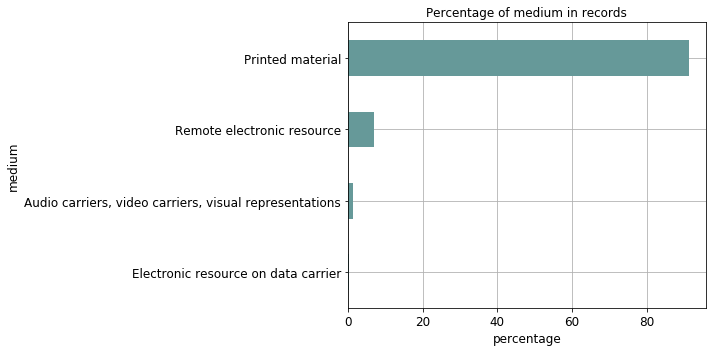

In [48]:
visualize.plot_bar_counter(df.loc[(df["medium_1_letter_standard"].isin(media_lt) )], "medium_1_letter_standard", title = "Percentage of medium in records", xlabel= "percentage", ylabel = "medium", figure_name = "bar_medium_percentage", figsize = (10,5))

In [51]:
df.loc[(df["medium_1_letter_standard"].isin(media_lt) )]["medium_1_letter_standard"].value_counts(normalize=True)

Printed material                                          0.912163
Remote electronic resource                                0.070555
Audio carriers, video carriers, visual representations    0.014071
Electronic resource on data carrier                       0.003211
Name: medium_1_letter_standard, dtype: float64

In [28]:
df.loc[(df["medium_1_letter_standard"].isin(media_lt) )]["medium_1_letter_standard"].value_counts(normalize=True)

Printed material                                          0.912163
Remote electronic resource                                0.070555
Audio carriers, video carriers, visual representations    0.014071
Electronic resource on data carrier                       0.003211
Name: medium_1_letter_standard, dtype: float64

In [29]:
df["medium_stand"] = df["medium_1_letter_standard"] 

In [30]:
pd.DataFrame(df.loc[(df["medium_stand"].isin(media_lt) )]["medium_stand"].value_counts(normalize=True)*100).T.plot.barh(stacked=True, cmap = "tab20c_r")

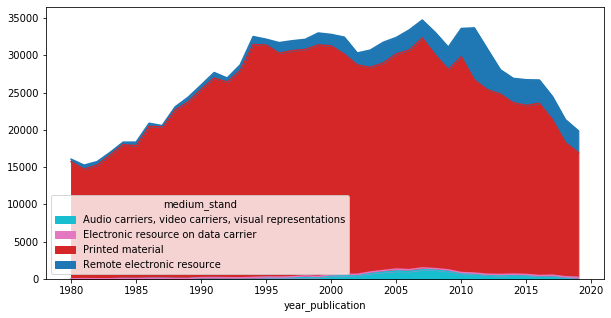

In [31]:
df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T.plot.area(figsize=(10,5), cmap= "tab10_r")


In [32]:
years_medium_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T.fillna(0)

In [33]:
years_medium_rel_df = years_medium_df.loc[:].div(df.groupby("year_publication")["ppn"].count(), axis="index")*100

In [34]:
years_medium_rel_df

medium_stand      Audio carriers, video carriers, visual representations  \
year_publication                                                           
1980                                                       0.093307        
1981                                                       0.182494        
1982                                                       0.126904        
1983                                                       0.093974        
1984                                                       0.298653        
1985                                                       0.244525        
1986                                                       0.358560        
1987                                                       0.382770        
1988                                                       0.228626        
1989                                                       0.192072        
1990                                                       0.622779        
1991                                                       0.617328        
1992                                                       0.578631        
1993                                                       0.463604        
1994                                                       0.486944        
1995                                                       0.586519        
1996                                                       0.499736        
1997                                                       0.489080        
1998                                                       0.575205        
1999                                                       0.572045        
2000                                                       1.219880        
2001                                                       1.327040        
2002                                                       1.689633        
2003                                                       2.408428        
2004                                                       2.825526        
2005                                                       3.176829        
2006                                                       3.008813        
2007                                                       3.499670        
2008                                                       3.593553        
2009                                                       3.232517        
2010                                                       2.215837        
2011                                                       2.097281        
2012                                                       1.699021        
2013                                                       1.662463        
2014                                                       1.929785        
2015                                                       1.907927        
2016                                                       1.410453        
2017                                                       1.754529        
2018                                                       1.119612        
2019                                                       0.873933        

medium_stand      Electronic resource on data carrier  Printed material  \
year_publication                                                          
1980                                         0.000000         97.685992   
1981                                         0.000000         95.711399   
1982                                         0.000000         96.732234   
1983                                         0.005873         97.574298   
1984                                         0.000000         97.534752   
1985                                         0.005434         96.712493   
1986                                         0.004781         97.408806   
1987                                         0.000000         98.483454   
1988                                         0.000000    

In [35]:
years_medium_rel_df.sum(axis=1)

year_publication
1980    99.900473
1981    99.459037
1982    99.822335
1983    99.676965
1984    99.587315
1985    99.701136
1986    99.818330
1987    99.646301
1988    99.529808
1989    99.595423
1990    99.384862
1991    99.364726
1992    99.318173
1993    99.318433
1994    98.956114
1995    98.734838
1996    98.382841
1997    98.271301
1998    98.314160
1999    98.799006
2000    99.027719
2001    99.405437
2002    99.419291
2003    99.481361
2004    98.666501
2005    98.737805
2006    99.109819
2007    99.529938
2008    99.398569
2009    99.503921
2010    99.517137
2011    99.748208
2012    99.657612
2013    99.683848
2014    99.821866
2015    99.746108
2016    99.820420
2017    99.666192
2018    99.687442
2019    99.758915
dtype: float64

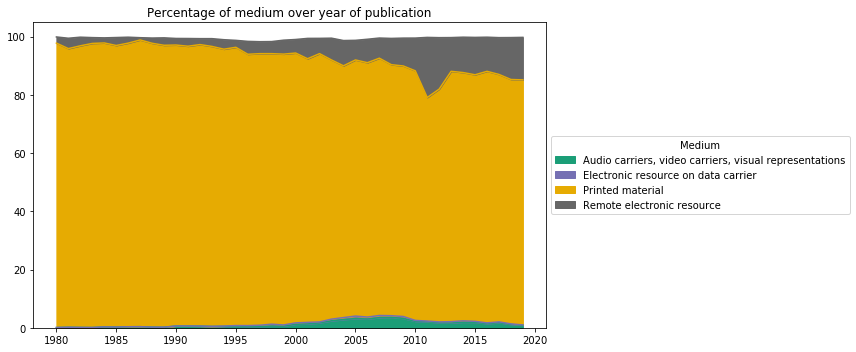

In [42]:
visualize.plot_area(years_medium_rel_df, title = "Percentage of medium over year of publication", cmap="Dark2", legend_title = "Medium", figure_name = "area_medium_develope")

In [45]:
years_medium_rel_df.tail(10).mean()

medium_stand
Audio carriers, video carriers, visual representations     1.667084
Electronic resource on data carrier                        0.298604
Printed material                                          83.790522
Remote electronic resource                                13.954565
dtype: float64

In [46]:
years_medium_rel_df.tail(2).mean()

medium_stand
Audio carriers, video carriers, visual representations     0.996772
Electronic resource on data carrier                        0.167210
Printed material                                          84.055830
Remote electronic resource                                14.503367
dtype: float64

In [37]:
visualize.plot_bars(years_medium_rel_df.diff(), percentage = False, title = "Mean difference of percentage", xlabel= "percentage of records", ylabel = "medium", figure_name = "bar_medium_diff")

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [29]:
#media_year_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().T

In [30]:
#media_year_df.head()

In [31]:
#media_year_df

In [32]:
#media_year_rel_df = df.loc[(df["medium_stand"].isin(media_lt) )].groupby(["medium_stand", "year_publication"])["medium_stand"].count().unstack().apply(lambda x: (x/x.sum()) * 100, axis=0).T

In [33]:
#media_year_rel_df.head()

In [38]:
statistical_results_medium_df = statistical_tests.calculate_regression_line(years_medium_rel_df)


In [39]:
statistical_results_medium_df

column  \
column                                                                                                  
Remote electronic resource                                                 Remote electronic resource   
Audio carriers, video carriers, visual represen...  Audio carriers, video carriers, visual represe...   
Electronic resource on data carrier                               Electronic resource on data carrier   
Printed material                                                                     Printed material   

                                                       slope   intercept  \
column                                                                     
Remote electronic resource                          0.373490 -740.092778   
Audio carriers, video carriers, visual represen...  0.062567 -123.844982   
Electronic resource on data carrier                 0.013264  -26.242181   
Printed material                                   -0.446707  984.326306   

                                                      rvalue        pvalue  \
column                                                                       
Remote electronic resource                          0.876765  1.207275e-13   
Audio carriers, video carriers, visual represen...  0.686218  1.019885e-06   
Electronic resource on data carrier                 0.596408  4.879691e-05   
Printed material                                   -0.915014  1.460534e-16   

                                                      stderr  
column                                                        
Remote electronic resource                          0.033233  
Audio carriers, video carriers, visual represen...  0.010759  
Electronic resource on data carrier                 0.002896  
Printed material                                    0.031949

In [40]:
visualize.plot_bars(statistical_results_medium_df.loc[statistical_results_medium_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each medium (p-value < 0.001)", xlabel ="slope", ylabel = "medium", figure_name = "bar_slop_medium")

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


# Languages

In [37]:
round(df["language_text"].notna().sum() / df.shape[0], 2)*100


98.0

In [38]:
languages_df = tokenize.tokenize_column(df, "language_text",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b\\w+\\b', max_features = 20, add_name_of_original_column = False)

Shape of tokens:  (1094658, 20)
Shape of tokens after filtering:  (1094658, 20)


In [39]:
languages_df

fre  ger  spa  ita  eng  por  none  cat  rum  lat  glg  fro  rus  \
309277221     1    0    0    0    0    0     0    0    0    0    0    0    0   
309277221     1    0    0    0    0    0     0    0    0    0    0    0    0   
309277221     1    0    0    0    0    0     0    0    0    0    0    0    0   
1642067407    1    0    0    0    0    0     0    0    0    0    0    0    0   
1734538619    1    0    0    0    0    0     0    0    0    0    0    0    0   
...         ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...   
800133854     0    1    0    0    0    0     0    0    0    0    0    0    0   
800133854     0    1    0    0    0    0     0    0    0    0    0    0    0   
800133250     0    0    0    0    0    0     0    1    0    0    0    0    0   
800132432     0    0    0    0    0    0     0    0    0    0    1    0    0   
800132432     0    0    0    0    0    0     0    0    0    0    1    0    0   

            frm  oci  roh  pol  dut  ara  mul  
309277221     0    0    0    0    0    0    0  
309277221     0    0    0    0    0    0    0  
309277221     0    0    0    0    0    0    0  
1642067407    0    0    0    0    0    0    0  
1734538619    0    0    0    0    0    0    0  
...         ...  ...  ...  ...  ...  ...  ...  
800133854     0    0    0    0    0    0    0  
800133854     0    0    0    0    0    0    0  
800133250     0    0    0    0    0    0    0  
800132432     0    0    0    0    0    0    0  
800132432     0    0    0    0    0    0    0  

[1094658 rows x 20 columns]

In [40]:
languages_lt = languages_df.columns.tolist()

In [41]:
df = pd.concat([df, languages_df], axis=1)

In [42]:
years_languages_df = df.groupby(["year_publication"])[languages_lt].sum()
years_languages_df

fre    ger   spa   ita   eng   por  none  cat  rum  lat  \
year_publication                                                              
1980               5976   4731  2383  1715  1190   518   970  246  220   45   
1981               5445   4361  2707  1817  1293   441   830  151  155   37   
1982               5573   4260  2698  1732  1474   426   746  145  173   23   
1983               5914   4639  2628  2207  1661   490   908  199  139   92   
1984               6476   5325  3059  2175  1397   451   839  231  138   52   
1985               6462   5160  3463  1785  1243   429  1135  294  130   16   
1986               7024   6302  3568  2213  1681   461  1086  265  193   47   
1987               6823   6388  3759  2597  1348   497   965  292  129   42   
1988               7318   7165  4213  3243  1768   553   772  358   84   69   
1989               8460   7359  4721  3298  1718   647   483  193  100   55   
1990               8658   7047  5804  3998  2128   730   547  241  136  112   
1991               9506   8162  5456  3995  2266   498   505  512  217  119   
1992               9313   7628  5423  3886  2309   699   467  283  111   87   
1993               9802   7505  5818  4744  2463   621   660  427   89  185   
1994              11380   8035  6595  5603  2738   898   426  490  179   88   
1995              10989   7740  6523  5677  2688   962   633  404  305  121   
1996              10527   8146  6678  5296  2792   929   675  446  269  179   
1997              11421   8470  6228  5268  2532  1139   393  441  220   91   
1998              11892   8436  6653  5217  2554  1440   330  655  191  114   
1999              11517   8696  6343  5192  3039  1382   425  525  301  232   
2000              10226   9099  7047  5235  3717  1367   446  528  356  183   
2001              10131   8878  6919  5529  3195  1374   441  523  309  268   
2002               9549   8641  6320  4977  3336  1005   623  387  210  175   
2003              10069   8337  6884  5006  3434  1216   504  314  227  185   
2004              10599   8931  7250  4911  3780  1109   531  375  145  243   
2005              10449   9453  7432  4773  3383  1161   429  494  192  149   
2006              10772   9721  7390  5199  3590  1266   760  583  182  226   
2007              10975  10940  7856  4952  3938  1210   406  434  312  247   
2008              10152  10142  7467  4452  3883  1448   345  379  169  174   
2009               9665   9360  6950  4425  3418  1138   484  421  138  177   
2010               9362  10432  7465  4133  3647  1533   752  417  192  148   
2011               8787  11997  7172  4002  3829  1360   341  376  190   97   
2012               9286  10433  6449  3536  2814   993   792  438  191  125   
2013               8193   9682  6400  3181  2967  1057   286  370  100  113   
2014               7735   8993  6116  3068  2814  1197   223  275  119  165   
2015               8066   9103  6143  3067  2539  1264   186  310   88   61   
2016               7217   9099  6297  2976  2459  1248    92  459  160   84   
2017               6643   9043  5695  2811  2030   941    57  373  119   82   
2018               5154   7404  5322  2827  2421   684    19  279  202   89   
2019               5182   6915  4817  2661  1543   658     4  251  172   51   

                  glg  fro  rus  frm  oci  roh  pol  dut  ara  mul  
year_publication                                                    
1980               21   69   73    5    9    7   28    5    2    0  
1981               23   34   11    0    2   34    0    7   10    0  
1982               18    7   44    0    8    2    1    6   11    0  
1983               18   87   46    0   22   10    3    0    2    0  
1984               11   39   29    0   22    6    5   12    2    0  
1985               42   40   29    2   22   25    8   19    1    0  
1986               24   51   43   21   45    9    3    0    4    0  
1987               29   73   71    0   16   12    9    9    9    0  
1988       

In [43]:
years_languages_rel_df = (years_languages_df.loc[:].div(years_languages_df.sum(axis='columns'), axis="index")*100).round(2)

In [44]:
years_languages_rel_df

fre    ger    spa    ita   eng   por  none   cat   rum  \
year_publication                                                             
1980              32.81  25.98  13.08   9.42  6.53  2.84  5.33  1.35  1.21   
1981              31.37  25.12  15.60  10.47  7.45  2.54  4.78  0.87  0.89   
1982              32.13  24.56  15.55   9.98  8.50  2.46  4.30  0.84  1.00   
1983              31.02  24.33  13.78  11.58  8.71  2.57  4.76  1.04  0.73   
1984              31.95  26.27  15.09  10.73  6.89  2.23  4.14  1.14  0.68   
1985              31.82  25.41  17.05   8.79  6.12  2.11  5.59  1.45  0.64   
1986              30.49  27.35  15.49   9.61  7.30  2.00  4.71  1.15  0.84   
1987              29.58  27.69  16.30  11.26  5.84  2.15  4.18  1.27  0.56   
1988              28.34  27.74  16.31  12.56  6.85  2.14  2.99  1.39  0.33   
1989              31.05  27.01  17.32  12.10  6.30  2.37  1.77  0.71  0.37   
1990              29.28  23.83  19.63  13.52  7.20  2.47  1.85  0.82  0.46   
1991              30.15  25.89  17.31  12.67  7.19  1.58  1.60  1.62  0.69   
1992              30.60  25.06  17.82  12.77  7.59  2.30  1.53  0.93  0.36   
1993              30.08  23.03  17.86  14.56  7.56  1.91  2.03  1.31  0.27   
1994              30.90  21.82  17.91  15.22  7.44  2.44  1.16  1.33  0.49   
1995              30.21  21.28  17.93  15.61  7.39  2.64  1.74  1.11  0.84   
1996              29.07  22.49  18.44  14.62  7.71  2.57  1.86  1.23  0.74   
1997              31.29  23.20  17.06  14.43  6.94  3.12  1.08  1.21  0.60   
1998              31.44  22.30  17.59  13.79  6.75  3.81  0.87  1.73  0.50   
1999              30.26  22.85  16.66  13.64  7.98  3.63  1.12  1.38  0.79   
2000              26.38  23.48  18.18  13.51  9.59  3.53  1.15  1.36  0.92   
2001              26.59  23.30  18.16  14.51  8.39  3.61  1.16  1.37  0.81   
2002              26.81  24.26  17.74  13.97  9.37  2.82  1.75  1.09  0.59   
2003              27.47  22.74  18.78  13.65  9.37  3.32  1.37  0.86  0.62   
2004              27.69  23.34  18.94  12.83  9.88  2.90  1.39  0.98  0.38   
2005              27.21  24.62  19.35  12.43  8.81  3.02  1.12  1.29  0.50   
2006              26.75  24.14  18.35  12.91  8.91  3.14  1.89  1.45  0.45   
2007              26.25  26.16  18.79  11.84  9.42  2.89  0.97  1.04  0.75   
2008              25.98  25.95  19.11  11.39  9.94  3.71  0.88  0.97  0.43   
2009              26.41  25.58  18.99  12.09  9.34  3.11  1.32  1.15  0.38   
2010              24.12  26.87  19.23  10.65  9.39  3.95  1.94  1.07  0.49   
2011              22.71  31.01  18.54  10.34  9.90  3.51  0.88  0.97  0.49   
2012              26.19  29.43  18.19   9.97  7.94  2.80  2.23  1.24  0.54   
2013              25.06  29.61  19.57   9.73  9.07  3.23  0.87  1.13  0.31   
2014              24.99  29.05  19.76   9.91  9.09  3.87  0.72  0.89  0.38   
2015              25.89  29.22  19.72   9.85  8.15  4.06  0.60  1.00  0.28   
2016              23.74  29.93  20.71   9.79  8.09  4.10  0.30  1.51  0.53   
2017              23.67  32.22  20.29  10.01  7.23  3.35  0.20  1.33  0.42   
2018              20.87  29.99  21.55  11.45  9.80  2.77  0.08  1.13  0.82   
2019              23.10  30.82  21.47  11.86  6.88  2.93  0.02  1.12  0.77   

                   lat   glg   fro   rus   frm   oci   roh   pol   dut   ara  \
year_publication                                                               
1980              0.25  0.12  0.38  0.40  0.03  0.05  0.04  0.15  0.03  0.01   
1981              0.21  0.13  0.20  0.06  0.00  0.01  0.20  0.00  0.04  0.06   
1982              0.13  0.10  0.04  0.25  0.00  0.05  0.01  0.01  0.03  0.06   
1983              0.48  0.09  0.46  0.24  0.00  0.12  0.05  0.02  0.00  0.01   
1984              0.26  0.05  0.19  0.14  0.00  0.11  0.03  0.02  0.06  0.01   
1985              0.08  0.21  0.20  0.14  0.01  0.11  0.12  0.04  0.09  0.00   
1986              0.20  0.10  0.22  0.19  0.09  0.20  0.04  0.01  0.00  0.02   
1987              0.18 

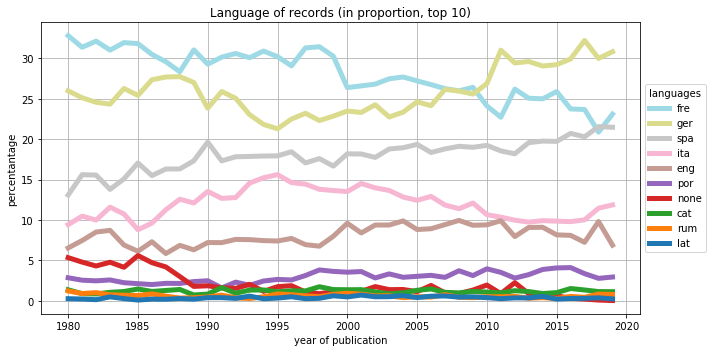

In [45]:
visualize.plot_lines(years_languages_rel_df.iloc[:,0:10], title = "Language of records (in proportion, top 10)",
cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_languages",
title_legend = "languages"
)

In [46]:
languages_rel_df = (df[languages_lt].sum().div(df.shape[0])*100).round(2)

In [47]:
languages_rel_df

fre     31.85
ger     29.43
spa     20.84
ita     14.01
eng      9.41
por      3.42
none     1.97
cat      1.35
rum      0.66
lat      0.44
glg      0.29
fro      0.24
rus      0.15
frm      0.10
oci      0.09
roh      0.09
pol      0.08
dut      0.07
ara      0.06
mul      0.06
dtype: float64

In [48]:
round(df[languages_lt].sum().div(df.shape[0])*100,2).sort_values(ascending=True)

mul      0.06
ara      0.06
dut      0.07
pol      0.08
roh      0.09
oci      0.09
frm      0.10
rus      0.15
fro      0.24
glg      0.29
lat      0.44
rum      0.66
cat      1.35
none     1.97
por      3.42
eng      9.41
ita     14.01
spa     20.84
ger     29.43
fre     31.85
dtype: float64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


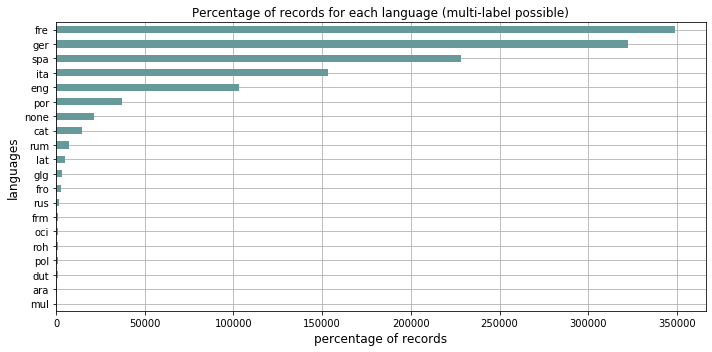

In [49]:
visualize.plot_bars(df[languages_lt], title = "Percentage of records for each language (multi-label possible)", xlabel= "percentage of records", ylabel = "languages", figure_name = "bar_languages")

In [50]:
languages_rel_df

fre     31.85
ger     29.43
spa     20.84
ita     14.01
eng      9.41
por      3.42
none     1.97
cat      1.35
rum      0.66
lat      0.44
glg      0.29
fro      0.24
rus      0.15
frm      0.10
oci      0.09
roh      0.09
pol      0.08
dut      0.07
ara      0.06
mul      0.06
dtype: float64

In [128]:
years_languages_rel_df

fre    ger    spa    ita   eng   por  none   cat   rum  \
year_publication                                                             
1980              32.81  25.98  13.08   9.42  6.53  2.84  5.33  1.35  1.21   
1981              31.37  25.12  15.60  10.47  7.45  2.54  4.78  0.87  0.89   
1982              32.13  24.56  15.55   9.98  8.50  2.46  4.30  0.84  1.00   
1983              31.02  24.33  13.78  11.58  8.71  2.57  4.76  1.04  0.73   
1984              31.95  26.27  15.09  10.73  6.89  2.23  4.14  1.14  0.68   
1985              31.82  25.41  17.05   8.79  6.12  2.11  5.59  1.45  0.64   
1986              30.49  27.35  15.49   9.61  7.30  2.00  4.71  1.15  0.84   
1987              29.58  27.69  16.30  11.26  5.84  2.15  4.18  1.27  0.56   
1988              28.34  27.74  16.31  12.56  6.85  2.14  2.99  1.39  0.33   
1989              31.05  27.01  17.32  12.10  6.30  2.37  1.77  0.71  0.37   
1990              29.28  23.83  19.63  13.52  7.20  2.47  1.85  0.82  0.46   
1991              30.15  25.89  17.31  12.67  7.19  1.58  1.60  1.62  0.69   
1992              30.60  25.06  17.82  12.77  7.59  2.30  1.53  0.93  0.36   
1993              30.08  23.03  17.86  14.56  7.56  1.91  2.03  1.31  0.27   
1994              30.90  21.82  17.91  15.22  7.44  2.44  1.16  1.33  0.49   
1995              30.21  21.28  17.93  15.61  7.39  2.64  1.74  1.11  0.84   
1996              29.07  22.49  18.44  14.62  7.71  2.57  1.86  1.23  0.74   
1997              31.29  23.20  17.06  14.43  6.94  3.12  1.08  1.21  0.60   
1998              31.44  22.30  17.59  13.79  6.75  3.81  0.87  1.73  0.50   
1999              30.26  22.85  16.66  13.64  7.98  3.63  1.12  1.38  0.79   
2000              26.38  23.48  18.18  13.51  9.59  3.53  1.15  1.36  0.92   
2001              26.59  23.30  18.16  14.51  8.39  3.61  1.16  1.37  0.81   
2002              26.81  24.26  17.74  13.97  9.37  2.82  1.75  1.09  0.59   
2003              27.47  22.74  18.78  13.65  9.37  3.32  1.37  0.86  0.62   
2004              27.69  23.34  18.94  12.83  9.88  2.90  1.39  0.98  0.38   
2005              27.21  24.62  19.35  12.43  8.81  3.02  1.12  1.29  0.50   
2006              26.75  24.14  18.35  12.91  8.91  3.14  1.89  1.45  0.45   
2007              26.25  26.16  18.79  11.84  9.42  2.89  0.97  1.04  0.75   
2008              25.98  25.95  19.11  11.39  9.94  3.71  0.88  0.97  0.43   
2009              26.41  25.58  18.99  12.09  9.34  3.11  1.32  1.15  0.38   
2010              24.12  26.87  19.23  10.65  9.39  3.95  1.94  1.07  0.49   
2011              22.71  31.01  18.54  10.34  9.90  3.51  0.88  0.97  0.49   
2012              26.19  29.43  18.19   9.97  7.94  2.80  2.23  1.24  0.54   
2013              25.06  29.61  19.57   9.73  9.07  3.23  0.87  1.13  0.31   
2014              24.99  29.05  19.76   9.91  9.09  3.87  0.72  0.89  0.38   
2015              25.89  29.22  19.72   9.85  8.15  4.06  0.60  1.00  0.28   
2016              23.74  29.93  20.71   9.79  8.09  4.10  0.30  1.51  0.53   
2017              23.67  32.22  20.29  10.01  7.23  3.35  0.20  1.33  0.42   
2018              20.87  29.99  21.55  11.45  9.80  2.77  0.08  1.13  0.82   
2019              23.10  30.82  21.47  11.86  6.88  2.93  0.02  1.12  0.77   

                   lat   glg   fro   rus   frm   oci   roh   pol   dut   ara  \
year_publication                                                               
1980              0.25  0.12  0.38  0.40  0.03  0.05  0.04  0.15  0.03  0.01   
1981              0.21  0.13  0.20  0.06  0.00  0.01  0.20  0.00  0.04  0.06   
1982              0.13  0.10  0.04  0.25  0.00  0.05  0.01  0.01  0.03  0.06   
1983              0.48  0.09  0.46  0.24  0.00  0.12  0.05  0.02  0.00  0.01   
1984              0.26  0.05  0.19  0.14  0.00  0.11  0.03  0.02  0.06  0.01   
1985              0.08  0.21  0.20  0.14  0.01  0.11  0.12  0.04  0.09  0.00   
1986              0.20  0.10  0.22  0.19  0.09  0.20  0.04  0.01  0.00  0.02   
1987              0.18 

In [58]:
years_languages_rel_df.diff()

fre   ger   spa   ita   eng   por  none   cat   rum   lat  \
year_publication                                                               
1980               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1981             -1.44 -0.86  2.52  1.05  0.92 -0.30 -0.55 -0.48 -0.32 -0.04   
1982              0.76 -0.56 -0.05 -0.49  1.05 -0.08 -0.48 -0.03  0.11 -0.08   
1983             -1.11 -0.23 -1.77  1.60  0.21  0.11  0.46  0.20 -0.27  0.35   
1984              0.93  1.94  1.31 -0.85 -1.82 -0.34 -0.62  0.10 -0.05 -0.22   
1985             -0.13 -0.86  1.96 -1.94 -0.77 -0.12  1.45  0.31 -0.04 -0.18   
1986             -1.33  1.94 -1.56  0.82  1.18 -0.11 -0.88 -0.30  0.20  0.12   
1987             -0.91  0.34  0.81  1.65 -1.46  0.15 -0.53  0.12 -0.28 -0.02   
1988             -1.24  0.05  0.01  1.30  1.01 -0.01 -1.19  0.12 -0.23  0.09   
1989              2.71 -0.73  1.01 -0.46 -0.55  0.23 -1.22 -0.68  0.04 -0.07   
1990             -1.77 -3.18  2.31  1.42  0.90  0.10  0.08  0.11  0.09  0.18   
1991              0.87  2.06 -2.32 -0.85 -0.01 -0.89 -0.25  0.80  0.23  0.00   
1992              0.45 -0.83  0.51  0.10  0.40  0.72 -0.07 -0.69 -0.33 -0.09   
1993             -0.52 -2.03  0.04  1.79 -0.03 -0.39  0.50  0.38 -0.09  0.28   
1994              0.82 -1.21  0.05  0.66 -0.12  0.53 -0.87  0.02  0.22 -0.33   
1995             -0.69 -0.54  0.02  0.39 -0.05  0.20  0.58 -0.22  0.35  0.09   
1996             -1.14  1.21  0.51 -0.99  0.32 -0.07  0.12  0.12 -0.10  0.16   
1997              2.22  0.71 -1.38 -0.19 -0.77  0.55 -0.78 -0.02 -0.14 -0.24   
1998              0.15 -0.90  0.53 -0.64 -0.19  0.69 -0.21  0.52 -0.10  0.05   
1999             -1.18  0.55 -0.93 -0.15  1.23 -0.18  0.25 -0.35  0.29  0.31   
2000             -3.88  0.63  1.52 -0.13  1.61 -0.10  0.03 -0.02  0.13 -0.14   
2001              0.21 -0.18 -0.02  1.00 -1.20  0.08  0.01  0.01 -0.11  0.23   
2002              0.22  0.96 -0.42 -0.54  0.98 -0.79  0.59 -0.28 -0.22 -0.21   
2003              0.66 -1.52  1.04 -0.32  0.00  0.50 -0.38 -0.23  0.03  0.01   
2004              0.22  0.60  0.16 -0.82  0.51 -0.42  0.02  0.12 -0.24  0.13   
2005             -0.48  1.28  0.41 -0.40 -1.07  0.12 -0.27  0.31  0.12 -0.24   
2006             -0.46 -0.48 -1.00  0.48  0.10  0.12  0.77  0.16 -0.05  0.17   
2007             -0.50  2.02  0.44 -1.07  0.51 -0.25 -0.92 -0.41  0.30  0.03   
2008             -0.27 -0.21  0.32 -0.45  0.52  0.82 -0.09 -0.07 -0.32 -0.14   
2009              0.43 -0.37 -0.12  0.70 -0.60 -0.60  0.44  0.18 -0.05  0.03   
2010             -2.29  1.29  0.24 -1.44  0.05  0.84  0.62 -0.08  0.11 -0.10   
2011             -1.41  4.14 -0.69 -0.31  0.51 -0.44 -1.06 -0.10  0.00 -0.13   
2012              3.48 -1.58 -0.35 -0.37 -1.96 -0.71  1.35  0.27  0.05  0.10   
2013             -1.13  0.18  1.38 -0.24  1.13  0.43 -1.36 -0.11 -0.23  0.00   
2014             -0.07 -0.56  0.19  0.18  0.02  0.64 -0.15 -0.24  0.07  0.18   
2015              0.90  0.17 -0.04 -0.06 -0.94  0.19 -0.12  0.11 -0.10 -0.33   
2016             -2.15  0.71  0.99 -0.06 -0.06  0.04 -0.30  0.51  0.25  0.08   
2017             -0.07  2.29 -0.42  0.22 -0.86 -0.75 -0.10 -0.18 -0.11  0.01   
2018             -2.80 -2.23  1.26  1.44  2.57 -0.58 -0.12 -0.20  0.40  0.07   
2019              2.23  0.83 -0.08  0.41 -2.92  0.16 -0.06 -0.01 -0.05 -0.13   

                   glg   fro   rus   frm   oci   roh   pol   dut   ara   mul  
year_publication                                                              
1980               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1981              0.01 -0.18 -0.34 -0.03 -0.04  0.16 -0.15  0.01  0.05  0.00  
1982             -0.03 -0.16  0.19  0.00  0.04 -0.19  0.01 -0.01  0.00  0.00  
1983             -0.01  0.42 -0.01  0.00  0.07  0.04  0.01 -0.03 -0.05  0.00  
1984             -0.04 -0.27 -0.10  0.00 -0.01 -0.02  0.00  0.06  0.00  0.00  
1985              0.16  0.01  0.00  0.01  0.00  0.09  0.02  0.03 -0.01  0.00  
1986             -0.11  0.

In [59]:
years_languages_rel_df.diff().sum()

fre    -9.71
ger     4.84
spa     8.39
ita     2.44
eng     0.35
por     0.09
none   -5.31
cat    -0.23
rum    -0.44
lat    -0.02
glg     0.05
fro    -0.12
rus    -0.33
frm     0.09
oci    -0.05
roh     0.04
pol    -0.11
dut    -0.03
ara     0.01
mul     0.03
dtype: float64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


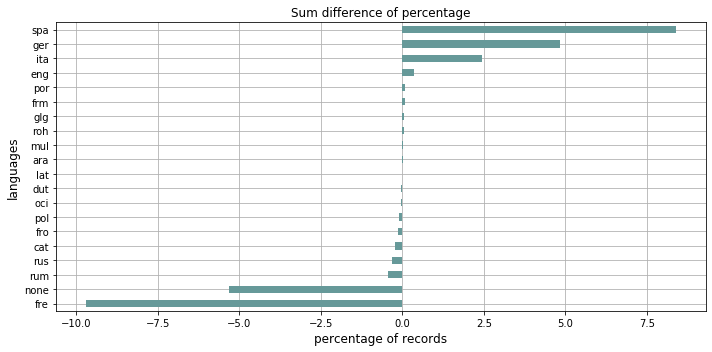

In [129]:
visualize.plot_bars(years_languages_rel_df.diff(), percentage = False, title = "Sum difference of percentage", xlabel= "percentage of records", ylabel = "languages", figure_name = "bar_diff_languages")

In [61]:
regression_results_languages_df = statistical_tests.calculate_regression_line(years_languages_rel_df)


In [62]:
regression_results_languages_df

column     slope   intercept    rvalue        pvalue    stderr
column                                                               
spa       spa  0.139417 -260.783312  0.873200  2.009614e-13  0.012623
ger       ger  0.123909 -221.882807  0.509178  7.924571e-04  0.033976
eng       eng  0.055947 -103.796961  0.554325  2.061755e-04  0.013627
por       por  0.037576  -72.220682  0.681690  1.279925e-06  0.006542
frm       frm  0.004127   -8.171470  0.739674  4.957756e-08  0.000609
glg       glg  0.004014   -7.794386  0.476794  1.867807e-03  0.001200
mul       mul  0.003921   -7.795941  0.433655  5.182394e-03  0.001322
lat       lat  0.003820   -7.273365  0.295578  6.406312e-02  0.002003
dut       dut  0.001903   -3.745553  0.473580  2.024639e-03  0.000574
pol       pol  0.000450   -0.837838  0.074112  6.494763e-01  0.000983
fro       fro  0.000419   -0.623189  0.049084  7.635881e-01  0.001384
ara       ara  0.000366   -0.682024  0.110347  4.978744e-01  0.000535
cat       cat  0.000200    0.771225  0.010149  9.504414e-01  0.003194
roh       roh -0.000358    0.791019 -0.084092  6.059278e-01  0.000689
oci       oci -0.001718    3.513163 -0.454759  3.197409e-03  0.000546
rus       rus -0.002949    6.034712 -0.387764  1.342657e-02  0.001137
rum       rum -0.007205   15.003529 -0.385702  1.397207e-02  0.002796
ita       ita -0.016794   45.579345 -0.106302  5.138527e-01  0.025482
none     none -0.108380  218.661410 -0.824550  6.149804e-11  0.012064
fre       fre -0.238752  505.428314 -0.909949  4.194200e-16  0.017652

In [63]:
regression_results_languages_df.loc[(regression_results_languages_df["pvalue"] < 0.001) & (regression_results_languages_df["slope"] > 0) ].round(3)

column  slope  intercept  rvalue  pvalue  stderr
column                                                 
spa       spa  0.139   -260.783   0.873   0.000   0.013
ger       ger  0.124   -221.883   0.509   0.001   0.034
eng       eng  0.056   -103.797   0.554   0.000   0.014
por       por  0.038    -72.221   0.682   0.000   0.007
frm       frm  0.004     -8.171   0.740   0.000   0.001

In [64]:
regression_results_languages_df.loc[(regression_results_languages_df["pvalue"] < 0.001) & (regression_results_languages_df["slope"] < 0) ].round(3)

column  slope  intercept  rvalue  pvalue  stderr
column                                                 
none     none -0.108    218.661  -0.825     0.0   0.012
fre       fre -0.239    505.428  -0.910     0.0   0.018

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


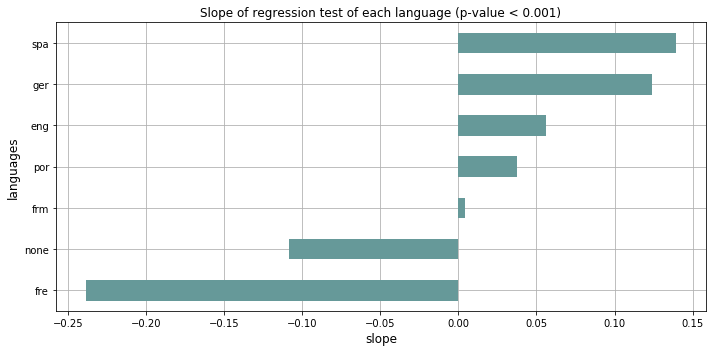

In [65]:
visualize.plot_bars(regression_results_languages_df.loc[regression_results_languages_df["pvalue"] < 0.001][["slope"]].T, title ="Slope of regression test of each language (p-value < 0.001)", xlabel ="slope", ylabel = "languages", figure_name = "bar_slop_language", figsize=(10,5))

# Publication Type

In [66]:
round(df["content_type"].notna().sum() / df.shape[0], 2)*100

46.0

In [67]:
df["content_type"].dropna()

ppn
1734538619               Zeitschrift
1641962577    Fiktionale Darstellung
1641962577    Fiktionale Darstellung
1641962577    Fiktionale Darstellung
194869113           Hochschulschrift
                       ...          
800149807           Konferenzschrift
800149807           Konferenzschrift
800149807           Konferenzschrift
800149807           Konferenzschrift
80014936X           Konferenzschrift
Name: content_type, Length: 500792, dtype: object

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:117: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


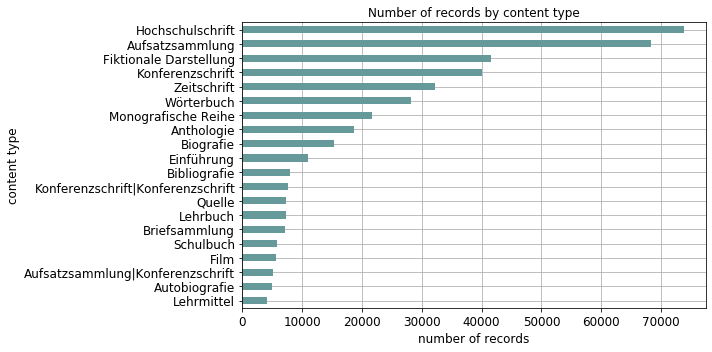

In [68]:
visualize.plot_bar_counter(df, "content_type", head = 20, percentage = False, title = "Number of records by content type", xlabel= "number of records", ylabel = "content type", figure_name = "content_type_number")


In [69]:
df.groupby("year_publication")["content_type"].count()

year_publication
1980     5333
1981     5150
1982     5629
1983     6042
1984     6577
1985     6392
1986     7651
1987     7467
1988     8305
1989     8989
1990     9251
1991    10286
1992    10487
1993    11801
1994    13988
1995    14423
1996    14781
1997    15301
1998    15883
1999    15882
2000    15971
2001    16167
2002    14712
2003    15760
2004    16657
2005    16948
2006    17073
2007    17009
2008    16773
2009    15261
2010    16259
2011    15392
2012    13878
2013    12698
2014    11909
2015    12465
2016    15641
2017    15447
2018    12981
2019    12173
Name: content_type, dtype: int64

In [70]:
df[["content_type"]].isna().groupby(df["year_publication"]).sum()["content_type"]

year_publication
1980    10743.0
1981    10193.0
1982    10131.0
1983    10984.0
1984    11839.0
1985    12011.0
1986    13266.0
1987    13172.0
1988    14877.0
1989    15481.0
1990    16922.0
1991    17576.0
1992    16646.0
1993    17103.0
1994    18870.0
1995    18142.0
1996    17436.0
1997    17209.0
1998    16801.0
1999    17507.0
2000    17147.0
2001    16462.0
2002    15768.0
2003    15090.0
2004    15514.0
2005    15852.0
2006    16628.0
2007    17880.0
2008    16481.0
2009    15984.0
2010    17498.0
2011    18366.0
2012    17081.0
2013    15453.0
2014    15037.0
2015    14318.0
2016    11088.0
2017     9118.0
2018     8455.0
2019     7737.0
Name: content_type, dtype: float64

In [71]:
df.groupby("year_publication")["ppn"].count()

year_publication
1980    16076
1981    15343
1982    15760
1983    17026
1984    18416
1985    18403
1986    20917
1987    20639
1988    23182
1989    24470
1990    26173
1991    27862
1992    27133
1993    28904
1994    32858
1995    32565
1996    32217
1997    32510
1998    32684
1999    33389
2000    33118
2001    32629
2002    30480
2003    30850
2004    32171
2005    32800
2006    33701
2007    34889
2008    33254
2009    31245
2010    33757
2011    33758
2012    30959
2013    28151
2014    26946
2015    26783
2016    26729
2017    24565
2018    21436
2019    19910
Name: ppn, dtype: int64

In [72]:
df.loc[df["year_publication"] == 1980].shape

(16076, 84)

In [73]:
df.loc[df["year_publication"] == 1980].shape

(16076, 84)

In [74]:
#df.loc[df["content_type"].]

In [75]:
df[["content_type"]].isna().groupby(df["year_publication"]).sum()["content_type"]

year_publication
1980    10743.0
1981    10193.0
1982    10131.0
1983    10984.0
1984    11839.0
1985    12011.0
1986    13266.0
1987    13172.0
1988    14877.0
1989    15481.0
1990    16922.0
1991    17576.0
1992    16646.0
1993    17103.0
1994    18870.0
1995    18142.0
1996    17436.0
1997    17209.0
1998    16801.0
1999    17507.0
2000    17147.0
2001    16462.0
2002    15768.0
2003    15090.0
2004    15514.0
2005    15852.0
2006    16628.0
2007    17880.0
2008    16481.0
2009    15984.0
2010    17498.0
2011    18366.0
2012    17081.0
2013    15453.0
2014    15037.0
2015    14318.0
2016    11088.0
2017     9118.0
2018     8455.0
2019     7737.0
Name: content_type, dtype: float64

In [76]:
df[["content_type"]].notna().groupby(df["year_publication"]).sum()["content_type"].div(df.groupby("year_publication")["ppn"].count())

year_publication
1980    0.331737
1981    0.335658
1982    0.357170
1983    0.354869
1984    0.357135
1985    0.347335
1986    0.365779
1987    0.361791
1988    0.358252
1989    0.367348
1990    0.353456
1991    0.369177
1992    0.386504
1993    0.408283
1994    0.425711
1995    0.442899
1996    0.458795
1997    0.470655
1998    0.485956
1999    0.475666
2000    0.482245
2001    0.495479
2002    0.482677
2003    0.510859
2004    0.517764
2005    0.516707
2006    0.506602
2007    0.487518
2008    0.504390
2009    0.488430
2010    0.481648
2011    0.455951
2012    0.448270
2013    0.451067
2014    0.441958
2015    0.465407
2016    0.585170
2017    0.628821
2018    0.605570
2019    0.611401
dtype: float64

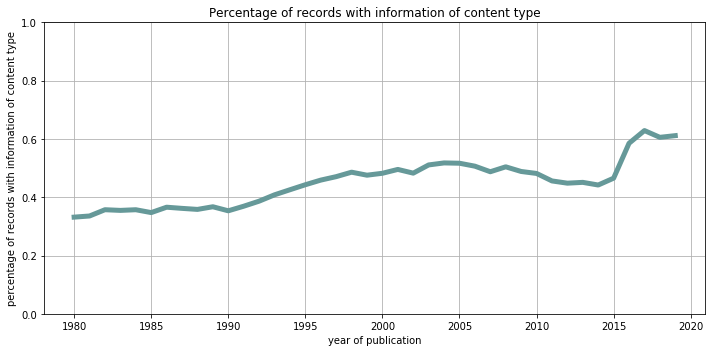

In [77]:
ax = df[["content_type"]].notna().groupby(df["year_publication"]).sum()["content_type"].div(df.groupby("year_publication")["ppn"].count()).plot.line(ylim=(0,1),
color = color, figsize = figsize, grid=True, title = "Percentage of records with information of content type",
linewidth=5)

ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("percentage of records with information of content type")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig("./../visualizations/content_type_percentage_chronological.png")


In [78]:
"""df.groupby("year_publication")["content_type"].count().plot.line(color = color, figsize = figsize, grid=True, title = "Number of records by content type",
linewidth=5)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title ="Languages")

ax.set_axisbelow(True)

ax.set_xlabel("number of records")
ax.set_ylabel("content type")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig("./../visualizations/content_type_number.png")
"""

'df.groupby("year_publication")["content_type"].count().plot.line(color = color, figsize = figsize, grid=True, title = "Number of records by content type",\nlinewidth=5)\n#plt.legend(loc=\'center left\', bbox_to_anchor=(1.0, 0.5), title ="Languages")\n\nax.set_axisbelow(True)\n\nax.set_xlabel("number of records")\nax.set_ylabel("content type")\nfig = ax.get_figure()\nplt.tight_layout()\n\nfig.savefig("./../visualizations/content_type_number.png")\n'

In [85]:
content_type_df = tokenize.tokenize_column(df, "content_type",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w\\s]+\\b', max_features = 100, add_name_of_original_column = True)

Shape of tokens:  (1094658, 100)
Shape of tokens after filtering:  (1094658, 100)


In [86]:
[column for column in content_type_df.columns.tolist() if "|" in column]

[]

In [87]:
content_type_df

none@content_type  aufsatzsammlung@content_type  \
309277221                   1                             0   
309277221                   1                             0   
309277221                   1                             0   
1642067407                  1                             0   
1734538619                  0                             0   
...                       ...                           ...   
800133854                   1                             0   
800133854                   1                             0   
800133250                   1                             0   
800132432                   1                             0   
800132432                   1                             0   

            hochschulschrift@content_type  konferenzschrift@content_type  \
309277221                               0                              0   
309277221                               0                              0   
309277221                               0                              0   
1642067407                              0                              0   
1734538619                              0                              0   
...                                   ...                            ...   
800133854                               0                              0   
800133854                               0                              0   
800133250                               0                              0   
800132432                               0                              0   
800132432                               0                              0   

            fiktionale darstellung@content_type  wörterbuch@content_type  \
309277221                                     0                        0   
309277221                                     0                        0   
309277221                                     0                        0   
1642067407                                    0                        0   
1734538619                                    0                        0   
...                                         ...                      ...   
800133854                                     0                        0   
800133854                                     0                        0   
800133250                                     0                        0   
800132432                                     0                        0   
800132432                                     0                        0   

            zeitschrift@content_type  monografische reihe@content_type  \
309277221                          0                                 0   
309277221                          0                                 0   
309277221                          0                                 0   
1642067407                         0                                 0   
1734538619                         1                                 0   
...                              ...                               ...   
800133854                          0                                 0   
800133854                          0                                 0   
800133250                          0                                 0   
800132432                          0                                 0   
800132432                          0                                 0   

            anthologie@content_type  biografie@content_type  ...  \
309277221                         0                       0  ...   
309277221                         0                       0  ...   
309277221                         0                       0  ...   
1642067407                        0                       0  ...   
1734538619                        0                       0  ...   
...                             ...                     ...  ...   
800133854                         0                       0  ...

In [88]:
df = pd.concat([df, content_type_df], axis=1)

In [89]:
df[content_type_df.columns.tolist()[0:10]]

none@content_type  aufsatzsammlung@content_type  \
ppn                                                           
309277221                   1                             0   
309277221                   1                             0   
309277221                   1                             0   
1642067407                  1                             0   
1734538619                  0                             0   
...                       ...                           ...   
800133854                   1                             0   
800133854                   1                             0   
800133250                   1                             0   
800132432                   1                             0   
800132432                   1                             0   

            hochschulschrift@content_type  konferenzschrift@content_type  \
ppn                                                                        
309277221                               0                              0   
309277221                               0                              0   
309277221                               0                              0   
1642067407                              0                              0   
1734538619                              0                              0   
...                                   ...                            ...   
800133854                               0                              0   
800133854                               0                              0   
800133250                               0                              0   
800132432                               0                              0   
800132432                               0                              0   

            fiktionale darstellung@content_type  wörterbuch@content_type  \
ppn                                                                        
309277221                                     0                        0   
309277221                                     0                        0   
309277221                                     0                        0   
1642067407                                    0                        0   
1734538619                                    0                        0   
...                                         ...                      ...   
800133854                                     0                        0   
800133854                                     0                        0   
800133250                                     0                        0   
800132432                                     0                        0   
800132432                                     0                        0   

            zeitschrift@content_type  monografische reihe@content_type  \
ppn                                                                      
309277221                          0                                 0   
309277221                          0                                 0   
309277221                          0                                 0   
1642067407                         0                                 0   
1734538619                         1                                 0   
...                              ...                               ...   
800133854                          0                                 0   
800133854                          0                                 0   
800133250                          0                                 0   
800132432                          0                                 0   
800132432                          0                                 0   

            anthologie@content_type  biografie@content_type  
ppn                                                          
309277221                         0                       0  
309277221                         0                       0  
309

In [90]:
years_content_type_df = df.groupby(["year_publication"])[content_type_df.columns.tolist()[0:20]].sum()
years_content_type_df

none@content_type  aufsatzsammlung@content_type  \
year_publication                                                    
1980                          10743                           773   
1981                          10193                           685   
1982                          10131                           967   
1983                          10984                          1292   
1984                          11839                          1346   
1985                          12011                          1215   
1986                          13266                          1385   
1987                          13172                          1324   
1988                          14877                          1651   
1989                          15481                          1550   
1990                          16922                          1629   
1991                          17576                          1638   
1992                          16646                          1780   
1993                          17103                          1795   
1994                          18870                          2343   
1995                          18142                          2340   
1996                          17436                          2292   
1997                          17209                          2660   
1998                          16801                          2582   
1999                          17507                          2860   
2000                          17147                          2936   
2001                          16462                          2883   
2002                          15768                          2567   
2003                          15090                          3152   
2004                          15514                          2927   
2005                          15852                          3070   
2006                          16628                          2966   
2007                          17880                          3172   
2008                          16481                          3470   
2009                          15984                          2932   
2010                          17498                          3456   
2011                          18366                          3366   
2012                          17081                          3066   
2013                          15453                          3116   
2014                          15037                          2999   
2015                          14318                          2710   
2016                          11088                          2690   
2017                           9118                          2240   
2018                           8455                          2090   
2019                           7737                          1864   

                  hochschulschrift@content_type  \
year_publication                                  
1980                                       1260   
1981                                       1173   
1982                                       1121   
1983                                        993   
1984                                       1274   
1985                                        917   
1986                                       1162   
1987                                       1282   
1988                                       1392   
1989                                       1208   
1990                                       1334   
1991                                       1545   
1992                                       1796   
1993                                       1802   
1994                                       2315   
1995                                       2262   
1996                                       2472   
1997                                       2712   
1998                                       2469   
1999                                       2375 

In [91]:
years_content_type_df

none@content_type  aufsatzsammlung@content_type  \
year_publication                                                    
1980                          10743                           773   
1981                          10193                           685   
1982                          10131                           967   
1983                          10984                          1292   
1984                          11839                          1346   
1985                          12011                          1215   
1986                          13266                          1385   
1987                          13172                          1324   
1988                          14877                          1651   
1989                          15481                          1550   
1990                          16922                          1629   
1991                          17576                          1638   
1992                          16646                          1780   
1993                          17103                          1795   
1994                          18870                          2343   
1995                          18142                          2340   
1996                          17436                          2292   
1997                          17209                          2660   
1998                          16801                          2582   
1999                          17507                          2860   
2000                          17147                          2936   
2001                          16462                          2883   
2002                          15768                          2567   
2003                          15090                          3152   
2004                          15514                          2927   
2005                          15852                          3070   
2006                          16628                          2966   
2007                          17880                          3172   
2008                          16481                          3470   
2009                          15984                          2932   
2010                          17498                          3456   
2011                          18366                          3366   
2012                          17081                          3066   
2013                          15453                          3116   
2014                          15037                          2999   
2015                          14318                          2710   
2016                          11088                          2690   
2017                           9118                          2240   
2018                           8455                          2090   
2019                           7737                          1864   

                  hochschulschrift@content_type  \
year_publication                                  
1980                                       1260   
1981                                       1173   
1982                                       1121   
1983                                        993   
1984                                       1274   
1985                                        917   
1986                                       1162   
1987                                       1282   
1988                                       1392   
1989                                       1208   
1990                                       1334   
1991                                       1545   
1992                                       1796   
1993                                       1802   
1994                                       2315   
1995                                       2262   
1996                                       2472   
1997                                       2712   
1998                                       2469   
1999                                       2375 

In [92]:
years_content_type_df.columns = years_content_type_df.columns.str.extract(r"(.*?)@")[0].values.tolist()

In [93]:
years_content_type_df.head()

none  aufsatzsammlung  hochschulschrift  konferenzschrift  \
year_publication                                                               
1980              10743              773              1260               475   
1981              10193              685              1173               560   
1982              10131              967              1121               579   
1983              10984             1292               993               643   
1984              11839             1346              1274               643   

                  fiktionale darstellung  wörterbuch  zeitschrift  \
year_publication                                                    
1980                                 139         490          602   
1981                                 154         368          738   
1982                                 188         509          742   
1983                                 105         471          672   
1984                                 152         517          766   

                  monografische reihe  anthologie  biografie  bibliografie  \
year_publication                                                             
1980                              396         271        168           279   
1981                              382         216         61           405   
1982                              352         378        188           385   
1983                              499         285        185           575   
1984                              442         249        348           438   

                  einführung  quelle  briefsammlung  festschrift  lehrbuch  \
year_publication                                                             
1980                     172      78             88          140         0   
1981                     159      72             17          111        23   
1982                     111     129             84          176         4   
1983                     229     106             70          246        13   
1984                     121     148            147          240        10   

                  schulbuch  autobiografie  ausstellungskatalog  film  
year_publication                                                       
1980                     23             61                   19     3  
1981                     54             56                   51     9  
1982                      2            134                   79    16  
1983                     16            173                   43    20  
1984                      7            115                   90    31

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


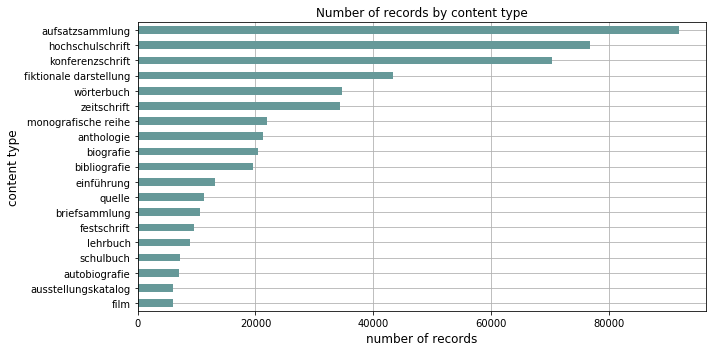

In [94]:
visualize.plot_bars(years_content_type_df.iloc[:,1:], head=20, title = "Number of records by content type", xlabel= "number of records", ylabel = "content type", figure_name = "content_type_number")

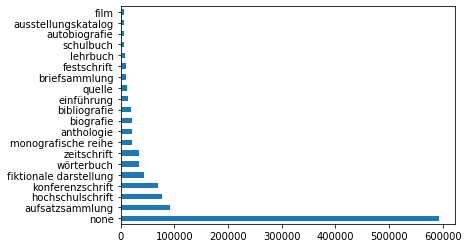

In [95]:
years_content_type_df.sum().plot.barh()

In [96]:
years_content_type_df.loc[:].div(years_content_type_df.sum(axis='columns'), axis="index")*100

none  aufsatzsammlung  hochschulschrift  \
year_publication                                                 
1980              66.396786         4.777503          7.787392   
1981              65.816491         4.423065          7.574094   
1982              62.248848         5.941628          6.887865   
1983              62.338252         7.332577          5.635641   
1984              62.564075         7.113037          6.732548   
1985              63.742504         6.448018          4.866529   
1986              62.673029         6.543204          5.489677   
1987              63.725206         6.405418          6.202225   
1988              63.008767         6.992503          5.895557   
1989              62.245185         6.232158          4.857062   
1990              64.113056         6.171857          5.054179   
1991              62.605970         5.834580          5.503313   
1992              60.550726         6.474846          6.533047   
1993              57.844895         6.070957          6.094633   
1994              56.480096         7.012870          6.929063   
1995              55.402187         7.145911          6.907714   
1996              53.535571         7.037367          7.590040   
1997              51.920350         8.025343          8.182230   
1998              50.508057         7.762145          7.422439   
1999              52.023654         8.498752          7.057530   
2000              51.110316         8.751379          7.410057   
2001              49.877291         8.735040          6.683836   
2002              50.864516         8.280645          7.803226   
2003              47.892599        10.003809          7.182303   
2004              47.278601         8.919973          7.908210   
2005              47.479558         9.195196          7.661665   
2006              48.715319         8.689538          7.423901   
2007              51.103235         9.065965          6.224991   
2008              49.354655        10.391399          6.109065   
2009              50.639970         9.289063          6.044861   
2010              51.466220        10.165005          6.120768   
2011              53.481261         9.801695          5.882182   
2012              54.052087         9.702225          5.889054   
2013              54.291536        10.947546          7.455293   
2014              55.509616        11.070914          7.981099   
2015              53.337804        10.095366          8.106094   
2016              40.683936         9.870111          8.160270   
2017              37.612408         9.240162          9.318538   
2018              39.489048         9.761338          8.850591   
2019              39.799383         9.588477          9.963992   

                  konferenzschrift  fiktionale darstellung  wörterbuch  \
year_publication                                                         
1980                      2.935723                0.859085    3.028430   
1981                      3.615936                0.994382    2.376186   
1982                      3.557604                1.155146    3.127496   
1983                      3.649262                0.595914    2.673099   
1984                      3.397981                0.803255    2.732125   
1985                      3.210741                1.385130    3.279733   
1986                      3.699154                1.436198    3.434592   
1987                      4.494436                1.528786    3.168844   
1988                      3.676253                1.249418    2.668248   
1989                      4.073017                1.676652    3.526195   
1990                      4.137304                1.117678    3.637190   
1991                      5.204103                1.278763    3.319798   
1992                      4.590593                1.258594    4.157724   
1993                      6.399026                2.269422    3.706835   
1994                      5.175097                2.511224    4.19

In [97]:
years_content_type_df.loc[:].div(years_content_type_df.sum(axis='columns'), axis="index")*100

none  aufsatzsammlung  hochschulschrift  \
year_publication                                                 
1980              66.396786         4.777503          7.787392   
1981              65.816491         4.423065          7.574094   
1982              62.248848         5.941628          6.887865   
1983              62.338252         7.332577          5.635641   
1984              62.564075         7.113037          6.732548   
1985              63.742504         6.448018          4.866529   
1986              62.673029         6.543204          5.489677   
1987              63.725206         6.405418          6.202225   
1988              63.008767         6.992503          5.895557   
1989              62.245185         6.232158          4.857062   
1990              64.113056         6.171857          5.054179   
1991              62.605970         5.834580          5.503313   
1992              60.550726         6.474846          6.533047   
1993              57.844895         6.070957          6.094633   
1994              56.480096         7.012870          6.929063   
1995              55.402187         7.145911          6.907714   
1996              53.535571         7.037367          7.590040   
1997              51.920350         8.025343          8.182230   
1998              50.508057         7.762145          7.422439   
1999              52.023654         8.498752          7.057530   
2000              51.110316         8.751379          7.410057   
2001              49.877291         8.735040          6.683836   
2002              50.864516         8.280645          7.803226   
2003              47.892599        10.003809          7.182303   
2004              47.278601         8.919973          7.908210   
2005              47.479558         9.195196          7.661665   
2006              48.715319         8.689538          7.423901   
2007              51.103235         9.065965          6.224991   
2008              49.354655        10.391399          6.109065   
2009              50.639970         9.289063          6.044861   
2010              51.466220        10.165005          6.120768   
2011              53.481261         9.801695          5.882182   
2012              54.052087         9.702225          5.889054   
2013              54.291536        10.947546          7.455293   
2014              55.509616        11.070914          7.981099   
2015              53.337804        10.095366          8.106094   
2016              40.683936         9.870111          8.160270   
2017              37.612408         9.240162          9.318538   
2018              39.489048         9.761338          8.850591   
2019              39.799383         9.588477          9.963992   

                  konferenzschrift  fiktionale darstellung  wörterbuch  \
year_publication                                                         
1980                      2.935723                0.859085    3.028430   
1981                      3.615936                0.994382    2.376186   
1982                      3.557604                1.155146    3.127496   
1983                      3.649262                0.595914    2.673099   
1984                      3.397981                0.803255    2.732125   
1985                      3.210741                1.385130    3.279733   
1986                      3.699154                1.436198    3.434592   
1987                      4.494436                1.528786    3.168844   
1988                      3.676253                1.249418    2.668248   
1989                      4.073017                1.676652    3.526195   
1990                      4.137304                1.117678    3.637190   
1991                      5.204103                1.278763    3.319798   
1992                      4.590593                1.258594    4.157724   
1993                      6.399026                2.269422    3.706835   
1994                      5.175097                2.511224    4.19

In [98]:
years_content_type_rel_df = years_content_type_df.loc[:].div(df.groupby("year_publication")["ppn"].count(), axis="index")*100

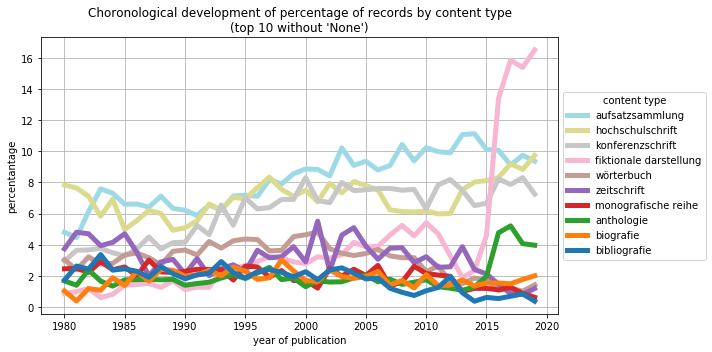

In [99]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,1:11], title = "Choronological development of percentage of records by content type\n(top 10 without 'None')", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_type", title_legend = "content type")


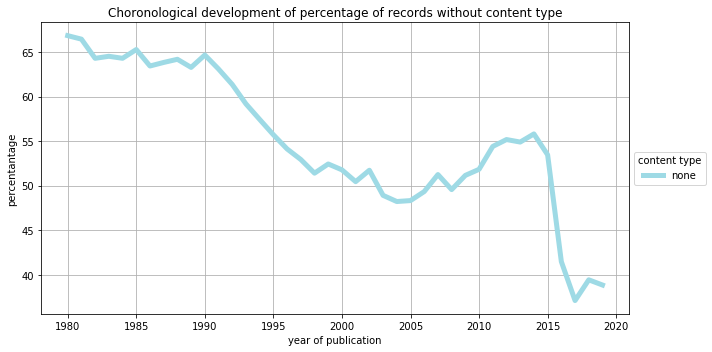

In [100]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,0:1], title = "Choronological development of percentage of records without content type", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_type_none", title_legend = "content type")


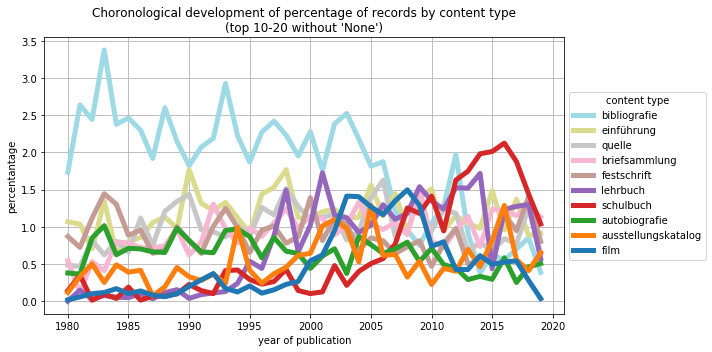

In [101]:
visualize.plot_lines(years_content_type_rel_df.iloc[:,10:21], title = "Choronological development of percentage of records by content type\n(top 10-20 without 'None')", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_content_20", title_legend = "content type")


C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


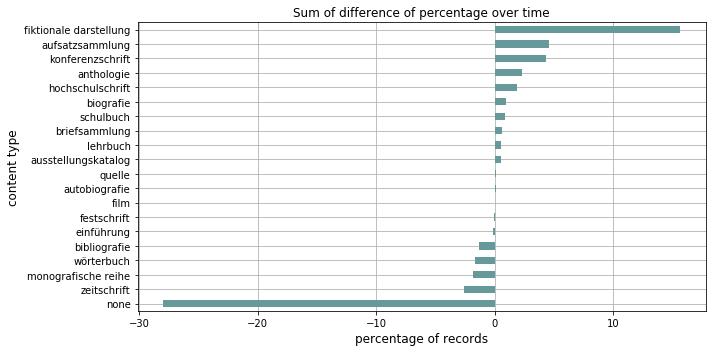

In [102]:
visualize.plot_bars(years_content_type_rel_df.diff(), percentage = False, title = "Sum of difference of percentage over time", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_content_type")

In [103]:
years_content_type_rel_df.columns.tolist()

['none',
 'aufsatzsammlung',
 'hochschulschrift',
 'konferenzschrift',
 'fiktionale darstellung',
 'wörterbuch',
 'zeitschrift',
 'monografische reihe',
 'anthologie',
 'biografie',
 'bibliografie',
 'einführung',
 'quelle',
 'briefsammlung',
 'festschrift',
 'lehrbuch',
 'schulbuch',
 'autobiografie',
 'ausstellungskatalog',
 'film']

In [104]:
regression_results_content_type_df = statistical_tests.calculate_regression_line(years_content_type_rel_df)

In [105]:
regression_results_content_type_df.loc[(regression_results_content_type_df["pvalue"] < 0.001) & (regression_results_content_type_df["slope"] > 0) ]

column     slope   intercept  \
column                                                                 
fiktionale darstellung  fiktionale darstellung  0.250221 -496.375371   
aufsatzsammlung                aufsatzsammlung  0.132208 -256.159664   
konferenzschrift              konferenzschrift  0.127989 -249.759428   
schulbuch                            schulbuch  0.047403  -94.143493   
lehrbuch                              lehrbuch  0.040336  -79.911507   
film                                      film  0.020283  -40.069818   
briefsammlung                    briefsammlung  0.015019  -29.098664   

                          rvalue        pvalue    stderr  
column                                                    
fiktionale darstellung  0.720028  1.631620e-07  0.039121  
aufsatzsammlung         0.893498  8.774633e-15  0.010779  
konferenzschrift        0.872176  2.319748e-13  0.011645  
schulbuch               0.837037  1.697626e-11  0.005027  
lehrbuch                0.798213  6.855676e-10  0.004938  
film                    0.516515  6.447829e-04  0.005455  
briefsammlung           0.637291  9.776006e-06  0.002946

In [106]:
regression_results_content_type_df.loc[(regression_results_content_type_df["pvalue"] < 0.001) & (regression_results_content_type_df["slope"] < 0) ]

column     slope    intercept    rvalue  \
column                                                                      
monografische reihe  monografische reihe -0.035984    73.970076 -0.705051   
wörterbuch                    wörterbuch -0.045458    93.982664 -0.520739   
bibliografie                bibliografie -0.051196   104.178499 -0.797187   
none                                none -0.591042  1236.832387 -0.869037   

                           pvalue    stderr  
column                                       
monografische reihe  3.791162e-07  0.005871  
wörterbuch           5.713819e-04  0.012090  
bibliografie         7.476333e-10  0.006290  
none                 3.575111e-13  0.054585

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


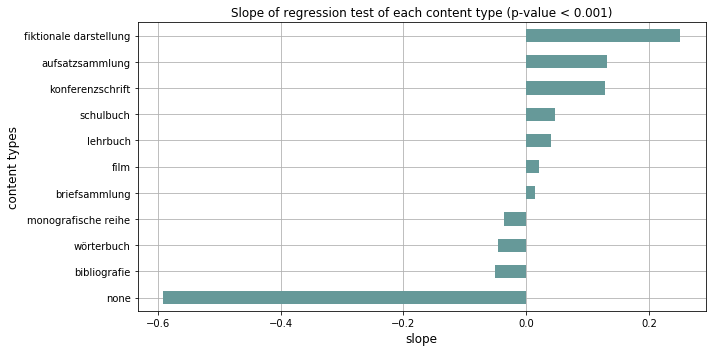

In [107]:
visualize.plot_bars(regression_results_content_type_df.loc[regression_results_content_type_df["pvalue"] < 0.001][["slope"]].T, title ="Slope of regression test of each content type (p-value < 0.001)", xlabel ="slope", ylabel = "content types", figure_name = "bar_slop_content_type", figsize=(10,5))

# Publishers

In [10]:
df.columns.tolist()

['ppn',
 'medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'ILNs_li

In [11]:
#df.drop(columns="none", inplace=True)


In [12]:

round(df["publisher"].notna().sum() / df.shape[0], 2)*100



98.0

In [13]:
df["publisher"]

ppn
309277221                             Boréal
309277221                             Boréal
309277221                             Boréal
1642067407                             Seuil
1734538619    [Francs et franches camarades]
                           ...              
800133854              Dt. Taschenbuch-Verl.
800133854              Dt. Taschenbuch-Verl.
800133250                   Editorial Gregal
800132432         Edicións Xerais de Galicia
800132432         Edicións Xerais de Galicia
Name: publisher, Length: 1094658, dtype: object

In [14]:
df["publisher"].str.replace(r"(?:de|ed|univ|verl|verlag|perss|ag)", r"", flags=re.I)

ppn
309277221                           Boréal
309277221                           Boréal
309277221                           Boréal
1642067407                           Seuil
1734538619    [Francs et franches camaras]
                          ...             
800133854                Dt. Taschenbuch-.
800133854                Dt. Taschenbuch-.
800133250                   itorial Gregal
800132432           icións Xerais  Galicia
800132432           icións Xerais  Galicia
Name: publisher, Length: 1094658, dtype: object

In [15]:
df["publisher_mod"] = df["publisher"].str.replace(r"(de|ed|univ|verl|verlag|perss|ag|publisher|pub|press|éd|presses|und|'|für|gmbh|du|editorial|la|\[u\.a\.\])[\W$]", r"", flags=re.I|re.M)
df["publisher_mod"] = df["publisher_mod"].str.replace(r"\s\s+", r" ")

In [16]:
df.sample(20, random_state=2021)[["publisher","publisher_mod"]]

publisher  \
ppn                                                             
322846080                                                Lang   
739903691                                                None   
1430484039                                          Cornelsen   
1108050468                                            Gangemi   
026278863                                            Vervuert   
573112444                            Santillana Ed. Generales   
018660215   Department of Spanish and Portuguese, Universi...   
522410901                                              Aracne   
367395150            Istituto Poligrafico e Zecca dello Stato   
127130845                              Universidad de Granada   
165170018                      Fondazione Pietro Bembo [u.a.]   
189933232                                 Bollati Boringhieri   
219380406                                         Seix Barral   
881672874                                     Carocci editore   
1172185840                                             Mucchi   
265652820                           Ed. Nueva Sociedad [u.a.]   
1666122238                              Ediciones Complutense   
184948029                       Ed. de la Univ. de Costa Rica   
562186298                                           Continuum   
238629279                               Libraria Padovana Ed.   

                                                publisher_mod  
ppn                                                            
322846080                                                Lang  
739903691                                                None  
1430484039                                          Cornelsen  
1108050468                                            Gangemi  
026278863                                            Vervuert  
573112444                                Santillana Generales  
018660215   Department of Spanish and Portuguese, Universi...  
522410901                                              Aracne  
367395150            Istituto Poligrafico e Zecca dello Stato  
127130845                                 Universidad Granada  
165170018                      Fondazione Pietro Bembo [u.a.]  
189933232                                 Bollati Boringhieri  
219380406                                         Seix Barral  
881672874                                     Carocci editore  
1172185840                                             Mucchi  
265652820                               Nueva Sociedad [u.a.]  
1666122238                              Ediciones Complutense  
184948029                                          Costa Rica  
562186298                                           Continuum  
238629279                                  Libraria Padovana

In [17]:
df["publisher_mod"].value_counts()

Gallimard                                 26584
Lang                                      26481
Gruyter                                   20368
Suhrkamp                                  12103
Narr                                      11905
                                          ...  
Éditions Chemins tr@verse                     1
 Toulouse-le Mirail                           1
Rose Chêne                                    1
Gente Nueva|Ediciones "Hermanos Loynaz        1
Plácido Gómez                                 1
Name: publisher_mod, Length: 50604, dtype: int64

In [18]:
publishers_df = tokenize.tokenize_column(df, "publisher_mod",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w \']{3,}\\b', max_features = 200, add_name_of_original_column = False)

Shape of tokens:  (1094658, 200)
Shape of tokens after filtering:  (1094658, 200)


In [19]:
publishers_df

gallimard  lang  gruyter  none  klett  champion  narr  vervuert  \
309277221           0     0        0     0      0         0     0         0   
309277221           0     0        0     0      0         0     0         0   
309277221           0     0        0     0      0         0     0         0   
1642067407          0     0        0     0      0         0     0         0   
1734538619          0     0        0     0      0         0     0         0   
...               ...   ...      ...   ...    ...       ...   ...       ...   
800133854           0     0        0     0      0         0     0         0   
800133854           0     0        0     0      0         0     0         0   
800133250           0     0        0     0      0         0     0         0   
800132432           0     0        0     0      0         0     0         0   
800132432           0     0        0     0      0         0     0         0   

            suhrkamp  niemeyer  ...  grin gmbh  acad  schena  dom quixote  \
309277221          0         0  ...          0     0       0            0   
309277221          0         0  ...          0     0       0            0   
309277221          0         0  ...          0     0       0            0   
1642067407         0         0  ...          0     0       0            0   
1734538619         0         0  ...          0     0       0            0   
...              ...       ...  ...        ...   ...     ...          ...   
800133854          0         0  ...          0     0       0            0   
800133854          0         0  ...          0     0       0            0   
800133250          0         0  ...          0     0       0            0   
800132432          0         0  ...          0     0       0            0   
800132432          0         0  ...          0     0       0            0   

            eichborn  anst  edizioni dell'orso  brepols  \
309277221          0     0                   0        0   
309277221          0     0                   0        0   
309277221          0     0                   0        0   
1642067407         0     0                   0        0   
1734538619         0     0                   0        0   
...              ...   ...                 ...      ...   
800133854          0     0                   0        0   
800133854          0     0                   0        0   
800133250          0     0                   0        0   
800132432          0     0                   0        0   
800132432          0     0                   0        0   

            consejo superior investigaciones científicas  sorbonne nouvelle  
309277221                                              0                  0  
309277221                                              0                  0  
309277221                                              0                  0  
1642067407                                             0                  0  
1734538619                                             0                  0  
...                                                  ...                ...  
800133854                                              0                  0  
800133854                                              0                  0  
800133250                                              0                  0  
800132432                                              0                  0  
800132432                                              0                  0  

[1094658 rows x 200 columns]

In [20]:
publishers_df.sum()

gallimard                                       27966
lang                                            27915
gruyter                                         21008
none                                            20286
klett                                           17973
                                                ...  
anst                                              929
edizioni dell'orso                                929
brepols                                           926
consejo superior investigaciones científicas      925
sorbonne nouvelle                                 921
Length: 200, dtype: int64

In [21]:
publishers_df.sum().sort_values(ascending=True)

sorbonne nouvelle                                 921
consejo superior investigaciones científicas      925
brepols                                           926
edizioni dell'orso                                929
anst                                              929
                                                ...  
klett                                           17973
none                                            20286
gruyter                                         21008
lang                                            27915
gallimard                                       27966
Length: 200, dtype: int64

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


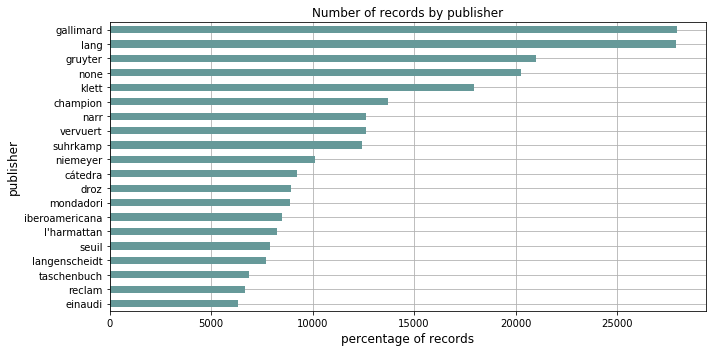

In [22]:
visualize.plot_bars(publishers_df, head=20, percentage = False, title = "Number of records by publisher", xlabel= "percentage of records", ylabel = "publisher", figure_name = "bar_publishers_number")        


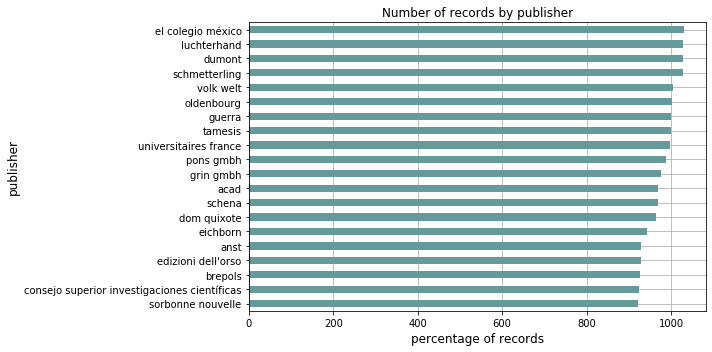

In [23]:
visualize.plot_bars(publishers_df, tail=20, percentage = False, title = "Number of records by publisher", xlabel= "percentage of records", ylabel = "publisher", figure_name = "bar_publishers_number_tail")        


In [24]:
publishers_lt = publishers_df.columns.tolist()

In [25]:
df = pd.concat([df, publishers_df], axis=1)

In [26]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... grin gmbh acad schena dom quixote eichborn  \
ppn                           ...                                              
309277221               None  ...         0    0      0           0        0   
309277221               None  ...         0    0      0           0        0   
309277221               None  ...         0    0      0           0        0   
1642067407              None  ...         0    0      0           0        0   
1734538619              None  ...         0    0      0           0        0   
...                      ...  ...       ...  ...    ...         ...      ...   
800133854              Peter  ...         0    0      0           0        0   
800133854              Peter  ...         0    0      0           0        0   
800133250               None  ...         0    0      0           0        0   
800132432               None  ...         0    0      0           0        0   
800132432               None  ...         0    0      0           0        0   

           anst edizioni dell'orso brepols  \
ppn                                          
309277221     0                  0       0   
309

In [27]:
publishers_lt

['gallimard',
 'lang',
 'gruyter',
 'none',
 'klett',
 'champion',
 'narr',
 'vervuert',
 'suhrkamp',
 'niemeyer',
 'cátedra',
 'droz',
 'mondadori',
 'iberoamericana',
 "l'harmattan",
 'seuil',
 'langenscheidt',
 'taschenbuch',
 'reclam',
 'einaudi',
 'rowohlt',
 'france',
 'classiques garnier',
 'hueber',
 'hanser',
 'inst',
 'winter',
 'rodopi',
 'wagenbach',
 'fink',
 'grasset',
 'insel',
 'fischer',
 'beck',
 'castalia',
 'flammarion',
 'verlag',
 'publ',
 'olschki',
 'bulzoni',
 'fayard',
 'cornelsen',
 'klett sprachen',
 'romanistischer',
 'seix barral',
 'voltaire foundation',
 'il mulino',
 'reichenberger',
 'larousse',
 'routledge',
 'planeta',
 'piper',
 'anagrama',
 'slatkine',
 'alfaguara',
 'stauffenburg',
 'nathan',
 'wiss',
 'diogenes',
 'neumann',
 'cambridge press',
 'garzanti',
 'rizzoli',
 'soc',
 'hachette',
 'königshausen',
 'aufbau',
 'peter lang',
 'cambridge university press',
 'metzler',
 'bompiani',
 'klincksieck',
 'lit',
 'minuit',
 'francke',
 'narr franck

In [28]:
df.columns.value_counts()

longo               1
francke             1
title_supplement    1
michel              1
droz                1
                   ..
schmidt             1
keyword_K10plus     1
timme               1
BK_ppn              1
ist                 1
Length: 262, dtype: int64

In [29]:
#df.drop(columns="none", inplace=True)


In [30]:

years_publishers_df = df.groupby(["year_publication"])[publishers_lt].sum()

In [31]:
years_publishers_df

gallimard  lang  gruyter  none  klett  champion  narr  \
year_publication                                                          
1980                    564   311       40   368    100        61   286   
1981                    572   326       98   409    135        32   245   
1982                    584   404       29   362    159        52   269   
1983                    714   269       83   435    182       114   244   
1984                    748   393       40   260    203        54   346   
1985                    606   300      149   308    183        46   222   
1986                    861   438       50   506    277        82   366   
1987                    688   464       40   314    217       121   328   
1988                    757   602       82   379    245       124   277   
1989                    923   469      153   375    312       150   231   
1990                    964   487      187   285    288       122   366   
1991                   1195   619      136   464    310       144   303   
1992                   1004   707       72   575    342       123   276   
1993                   1033   785      174   456    448       223   458   
1994                    965   943      331   704    704       287   395   
1995                    966  1161      169   720    512       437   340   
1996                    883   786      274  1097    555       360   350   
1997                    947   854      262   907    449       561   384   
1998                    730   919      167   859    830       692   477   
1999                    832  1098      245   643    563       778   317   
2000                    763  1200      200   958    657       521   446   
2001                    654   948      311   668    743       899   363   
2002                    689   951      237   521    546       797   524   
2003                    708   873      382   882    514       830   507   
2004                    597  1060      287   768    612       692   382   
2005                    651   923       57   761    674       594   463   
2006                    765  1061      222   616    782       672   463   
2007                    796  1156       55   647    940       609   510   
2008                    651   921      148   604    710       597   349   
2009                    648  1076      290   582    584       487   449   
2010                    607  1117     1199   544    701       516   359   
2011                    496  1068     4004   365    472       486   349   
2012                    501  1049     3193   399    691       413   308   
2013                    574  1026     1030   403    723       402   255   
2014                    402   730     1233   305    693       363   186   
2015                    488   413     1223   210    425       247   186   
2016                    390     6     1153   183    240         1    25   
2017                    365     2      960   214    151         1    16   
2018                    304     0      901   158     75         5     0   
2019                    381     0     1142    72     26         0    17   

                  vervuert  suhrkamp  niemeyer  ...  grin gmbh  acad  schena  \
year_publication                                ...                            
1980                     0       349       182  ...          0    23       0   
1981                     6       292       219  ...          0    48       1   
1982                    55       301       115  ...          0    34       5   
1983                    40       258       109  ...          0    49      49   
1984                    33       349       160  ...          0    74      37   
1985                    25       395       184  ...          0    29      34   
1986                    57       360       146  ...          0    57       6   
1987                    74       358       222  ...          0    49      30   
1988                   122       393       326  ...          0    2

In [32]:
years_publishers_rel_df = years_publishers_df.loc[:].div(years_publishers_df.sum(axis='columns'), axis="index")*100

In [33]:
years_publishers_rel_df

gallimard      lang    gruyter      none     klett  \
year_publication                                                       
1980               6.641545  3.662270   0.471032  4.333490  1.177579   
1981               6.586826  3.754030   1.128512  4.709811  1.554583   
1982               6.409834  4.434200   0.318297  3.973219  1.745143   
1983               7.578009  2.855020   0.880917  4.616854  1.931649   
1984               7.063934  3.711399   0.377750  2.455378  1.917084   
1985               5.604883  2.774695   1.378098  2.848687  1.692564   
1986               6.864934  3.492266   0.398661  4.034444  2.208579   
1987               5.663950  3.819873   0.329299  2.585000  1.786449   
1988               5.527161  4.395444   0.598715  2.767231  1.788843   
1989               6.504581  3.305144   1.078224  2.642706  2.198732   
1990               6.506040  3.286765   1.262064  1.923466  1.943713   
1991               7.094514  3.674899   0.807409  2.754690  1.840418   
1992               6.179602  4.351573   0.443159  3.539115  2.105004   
1993               6.068617  4.611679   1.022207  2.678886  2.631888   
1994               5.077077  4.961330   1.741464  3.703899  3.703899   
1995               5.225859  6.280768   0.914255  3.895050  2.769813   
1996               4.791101  4.264786   1.486706  5.952252  3.011394   
1997               4.990514  4.500422   1.380691  4.779722  2.366147   
1998               3.791814  4.773530   0.867442  4.461874  4.311240   
1999               4.120240  5.437528   1.213292  3.184272  2.788095   
2000               3.918447  6.162695   1.027116  4.919885  3.374076   
2001               3.429470  4.971159   1.630834  3.502884  3.896172   
2002               3.970037  5.479689   1.365601  3.002017  3.146067   
2003               4.054054  4.998855   2.187357  5.050389  2.943197   
2004               3.261404  5.790768   1.567878  4.195575  3.343349   
2005               3.603653  5.109327   0.315527  4.212566  3.730971   
2006               4.168029  5.780756   1.209546  3.356217  4.260652   
2007               3.958033  5.748098   0.273482  3.217145  4.674059   
2008               3.572212  5.053775   0.812116  3.314311  3.895961   
2009               3.536925  5.873042   1.582883  3.176682  3.187599   
2010               3.206042  5.899752   6.332858  2.873290  3.702530   
2011               2.453866  5.283728  19.809034  1.805769  2.335131   
2012               2.671573  5.593772  17.026609  2.127660  3.684744   
2013               3.651864  6.527548   6.552997  2.563939  4.599822   
2014               2.695454  4.894730   8.267400  2.045058  4.646641   
2015               3.625557  3.068351   9.086181  1.560178  3.157504   
2016               3.290029  0.050616   9.726675  1.543783  2.024633   
2017               3.274130  0.017940   8.611410  1.919627  1.354503   
2018               2.951456  0.000000   8.747573  1.533981  0.728155   
2019               4.168490  0.000000  12.494530  0.787746  0.284464   

                  champion      narr  vervuert  suhrkamp  niemeyer  ...  \
year_publication                                                    ...   
1980              0.718323  3.367876  0.000000  4.109750  2.143194  ...   
1981              0.368494  2.821281  0.069093  3.362506  2.521879  ...   
1982              0.570739  2.952475  0.603666  3.303699  1.262211  ...   
1983              1.209934  2.589684  0.424538  2.738272  1.156867  ...   
1984              0.509963  3.267542  0.311644  3.295873  1.511002  ...   
1985              0.425453  2.053274  0.231225  3.653348  1.701813  ...   
1986              0.653803  2.918195  0.454473  2.870356  1.164089  ...   
1987              0.996131  2.700255  0.609204  2.947230  1.827612  ...   
1988              0.905374  2.022488  0.890771  2.869451  2.380257  ...   
1989              1.057082  1.627907  0.775194  4.432699  2.198732  ...   
1990              0.823379  2.470136  0.492677  3.597219  2.517379  ...   
1991              

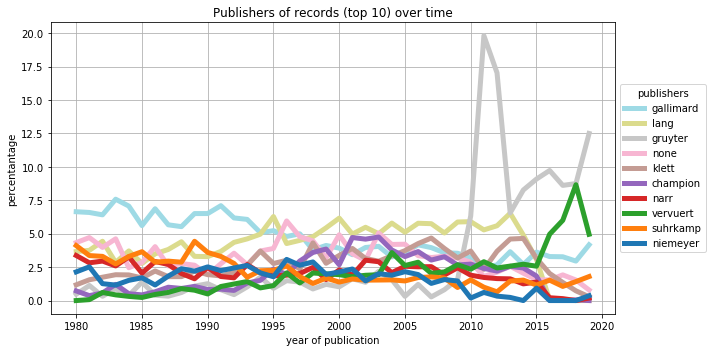

In [34]:
visualize.plot_lines(years_publishers_rel_df.iloc[:,0:10], title = "Publishers of records (top 10) over time", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "area_publishers_chronological_top_10", title_legend = "publishers")


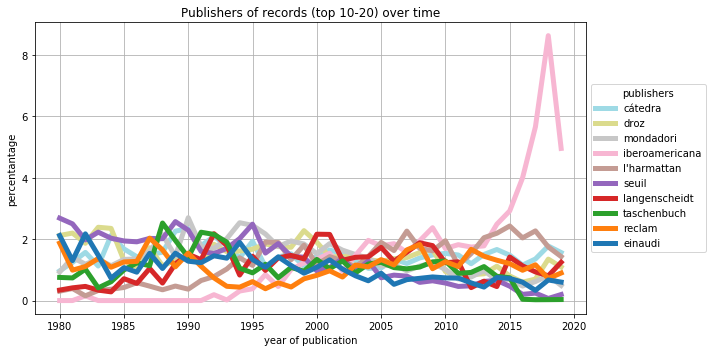

In [35]:
visualize.plot_lines(years_publishers_rel_df.iloc[:,10:20], title = "Publishers of records (top 10-20) over time", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "area_publishers_chronological_top_20", title_legend = "publishers")


In [36]:
years_publishers_rel_df.median(axis=1)

year_publication
1980    0.223740
1981    0.195762
1982    0.263418
1983    0.260030
1984    0.288035
1985    0.286718
1986    0.239196
1987    0.279905
1988    0.270152
1989    0.310078
1990    0.269960
1991    0.264189
1992    0.264664
1993    0.270239
1994    0.284106
1995    0.284014
1996    0.282149
1997    0.250316
1998    0.290879
1999    0.292180
2000    0.267050
2001    0.264814
2002    0.302506
2003    0.277714
2004    0.292270
2005    0.290617
2006    0.294214
2007    0.288399
2008    0.304543
2009    0.278369
2010    0.269371
2011    0.225103
2012    0.239962
2013    0.267210
2014    0.244736
2015    0.215453
2016    0.097014
2017    0.062792
2018    0.063107
2019    0.076586
dtype: float64

In [37]:
years_publishers_dummy_df = years_publishers_df.copy()
years_publishers_dummy_df.loc[ :] = 10

for index in years_publishers_dummy_df.index.tolist():
    years_publishers_dummy_df.loc[index, "gruyter"] = (index- 1979) * index


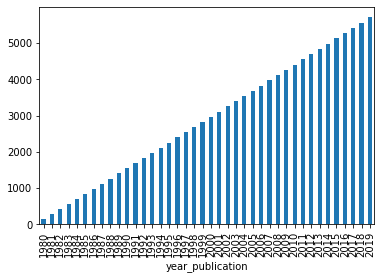

In [38]:
years_publishers_dummy_df.std(axis=1).plot.bar()

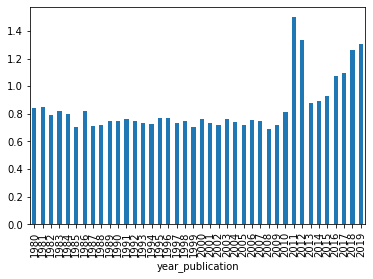

In [39]:
years_publishers_rel_df.std(axis=1).plot.bar()

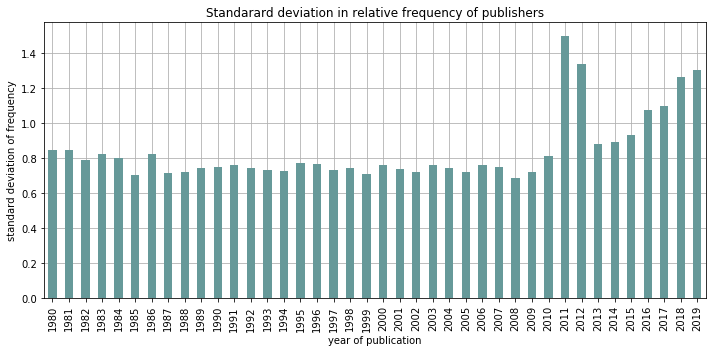

In [40]:
ax = years_publishers_rel_df.std(axis=1).plot.bar(figsize = figsize, title = "Standarard deviation in relative frequency of publishers", grid =True, color = color)

#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_axisbelow(True)

ax.set_xlabel("year of publication")
ax.set_ylabel("standard deviation of frequency")
fig = ax.get_figure()
plt.tight_layout()

fig.savefig( "./../visualizations/standard_deviation_relative_frequency_publishers.png", dpi=300, format="png")


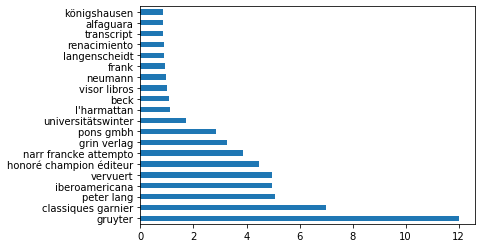

In [41]:
years_publishers_rel_df.diff().sum().sort_values(ascending=False).head(20).plot.barh()

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


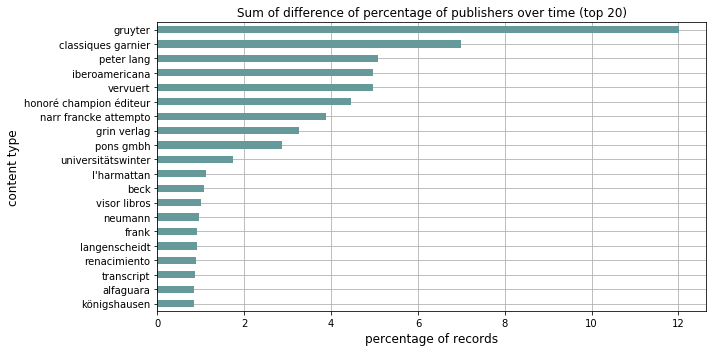

In [42]:
visualize.plot_bars(years_publishers_rel_df.diff(), head = 20, percentage = False, title = "Sum of difference of percentage of publishers over time (top 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")

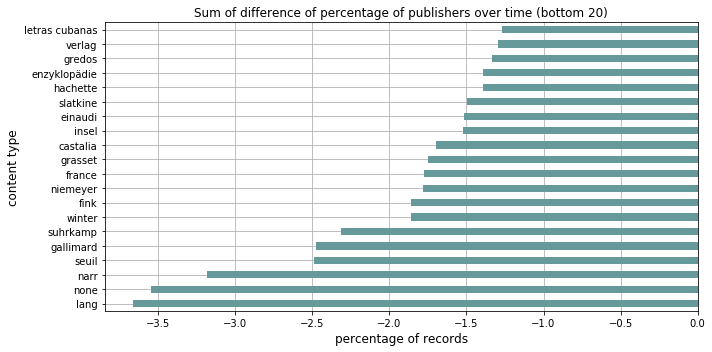

In [43]:
visualize.plot_bars(years_publishers_rel_df.diff(), tail = 20, percentage = False, title = "Sum of difference of percentage of publishers over time (bottom 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_bottom_20")

In [44]:
regression_results_publishers_df = statistical_tests.calculate_regression_line(years_publishers_rel_df)

In [45]:
regression_results_publishers_df.loc[(regression_results_publishers_df["pvalue"] < 0.001) & (regression_results_publishers_df["slope"] > 0) ]

column     slope   intercept  \
column                                                                         
gruyter                                        gruyter  0.275959 -548.361780   
iberoamericana                          iberoamericana  0.124840 -248.190380   
vervuert                                      vervuert  0.122574 -243.044240   
classiques garnier                  classiques garnier  0.119853 -238.572291   
peter lang                                  peter lang  0.062585 -124.616658   
narr francke attempto            narr francke attempto  0.060187 -119.867765   
honoré champion éditeur        honoré champion éditeur  0.056632 -112.787694   
gruyter mouton                          gruyter mouton  0.049622  -98.809832   
l'harmattan                                l'harmattan  0.049338  -97.390465   
transcript                                  transcript  0.044106  -87.794284   
cornelsen                                    cornelsen  0.034969  -69.384397   
klett sprachen                          klett sprachen  0.032488  -64.486815   
grin verlag                                grin verlag  0.032335  -64.313792   
universitätswinter                  universitätswinter  0.030714  -61.163590   
pons gmbh                                    pons gmbh  0.029973  -59.705292   
neumann                                        neumann  0.027089  -53.747707   
königshausen                              königshausen  0.026196  -51.982955   
frank                                            frank  0.025983  -51.717808   
timme                                            timme  0.023975  -47.716769   
matthes                                        matthes  0.021220  -42.078712   
palgrave macmillan                  palgrave macmillan  0.021120  -41.988967   
iberoamericana vervuert        iberoamericana vervuert  0.020350  -40.409650   
oxford university press        oxford university press  0.019479  -38.705166   
hermann                                        hermann  0.018791  -37.351090   
renacimiento                              renacimiento  0.017605  -35.008051   
visor libros                              visor libros  0.016945  -33.635695   
beck                                              beck  0.016808  -32.989717   
lit                                                lit  0.016511  -32.674067   
cambridge university press  cambridge university press  0.015721  -31.059930   
ibidem                                          ibidem  0.015017  -29.859705   
alfaguara                                    alfaguara  0.014628  -28.796311   
verbum                                          verbum  0.012473  -24.756571   
seitz                                            seitz  0.012358  -24.434181   
frey                                              frey  0.011725  -23.226657   
carocci                                        carocci  0.011147  -22.088290   
galaxia gutenberg                    galaxia gutenberg  0.011014  -21.866363   
brepols                                        brepols  0.010736  -21.326489   
difusión                                      difusión  0.010031  -19.885294   
kovač                                            kovač  0.009562  -18.946807   
edizioni dell'orso                  edizioni dell'orso  0.009244  -18.327224   
hoffmann campe                          hoffmann campe  0.008858  -17.524699   
anagrama                                      anagrama  0.008396  -16.352617   
rennes                                          rennes  0.008072  -15.986990   
actes sud                                    actes sud  0.007927  -15.538016   
tamesis                                        tamesis  0.007039  -13.928104   
arco                                              arco  0.006999  -13.781450   
libros                                          libros  0.006832  -13.452363   
cle international                    cle international  0.006361  -12.511358   
sorbonne nouvelle                    sorbonne no

In [46]:

regression_results_publishers_df.loc[(regression_results_publishers_df["pvalue"] < 0.001) & (regression_results_publishers_df["slope"] < 0) ]

column     slope   intercept    rvalue        pvalue  \
column                                                                         
didier                  didier -0.004673    9.512437 -0.545151  2.753011e-04   
julliard              julliard -0.006005   12.186804 -0.691717  7.697942e-07   
schena                  schena -0.006038   12.228331 -0.512080  7.307920e-04   
plon                      plon -0.006415   13.024939 -0.657809  3.981744e-06   
mercure france  mercure france -0.006690   13.579419 -0.841335  1.062995e-11   
...                        ...       ...         ...       ...           ...   
niemeyer              niemeyer -0.049564  100.679840 -0.646573  6.565536e-06   
france                  france -0.056240  113.431534 -0.899505  3.073328e-15   
seuil                    seuil -0.061483  124.260865 -0.939985  2.453438e-19   
suhrkamp              suhrkamp -0.067868  137.831262 -0.835741  1.949962e-11   
gallimard            gallimard -0.112050  228.737804 -0.891722  1.182311e-14   

                  stderr  
column                    
didier          0.001166  
julliard        0.001017  
schena          0.001643  
plon            0.001192  
mercure france  0.000697  
...                  ...  
niemeyer        0.009486  
france          0.004431  
seuil           0.003621  
suhrkamp        0.007234  
gallimard       0.009225  

[63 rows x 6 columns]

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


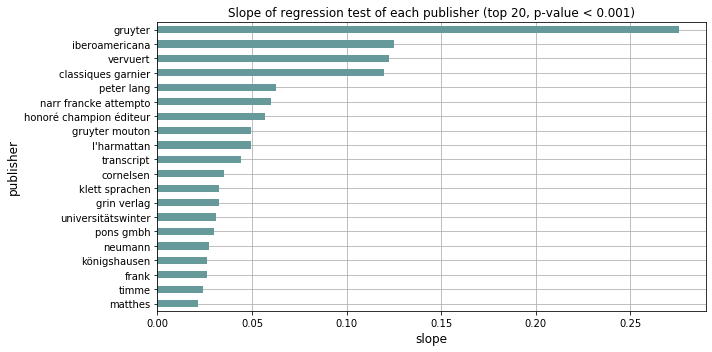

In [47]:
visualize.plot_bars(regression_results_publishers_df.loc[regression_results_publishers_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each publisher (top 20, p-value < 0.001)", xlabel ="slope", ylabel = "publisher", figure_name = "bar_slop_publisher_top", figsize=(10,5))

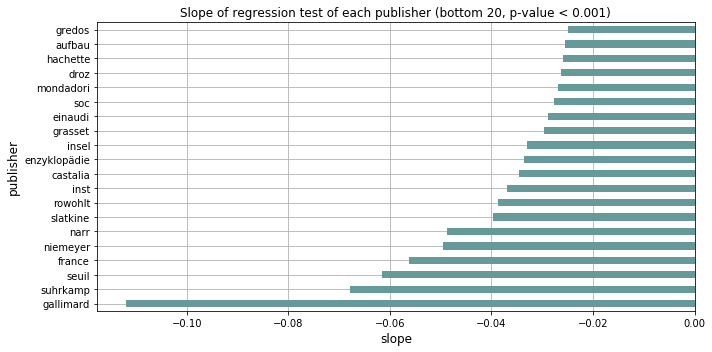

In [48]:
visualize.plot_bars(regression_results_publishers_df.loc[regression_results_publishers_df["pvalue"] < 0.001][["slope"]].tail(20).T, title ="Slope of regression test of each publisher (bottom 20, p-value < 0.001)", xlabel ="slope", ylabel = "publisher", figure_name = "bar_slop_publisher", figsize=(10,5))

# Place of publications

In [9]:
round(df["place_publication"].notna().sum() / df.shape[0], 2)*100

99.0

In [10]:
#df["publisher"].str.replace(r"(?:de|ed|univ|verl|verlag|perss|ag)", r"", flags=re.I)
#df["publisher_mod"] = df["publisher_mod"].str.replace(r"\s\s+", r" ")


In [11]:
df.loc[df["place_publication"].fillna("").str.contains("Frankfurt a\. M\.")]["place_publication"]

ppn
1133883036                            Frankfurt a. M.
01252557X                             Frankfurt a. M.
01252557X                             Frankfurt a. M.
01252557X                             Frankfurt a. M.
01252557X                             Frankfurt a. M.
                               ...                   
775618500     Bern|Berlin|Frankfurt a. M.|Wien [u.a.]
775618500     Bern|Berlin|Frankfurt a. M.|Wien [u.a.]
775618500     Bern|Berlin|Frankfurt a. M.|Wien [u.a.]
775618500     Bern|Berlin|Frankfurt a. M.|Wien [u.a.]
775618500     Bern|Berlin|Frankfurt a. M.|Wien [u.a.]
Name: place_publication, Length: 986, dtype: object

In [12]:
df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt a\. M\.", r"Frankfurt am Main", flags=re.I)

In [13]:
df.loc[df["place_publication"].fillna("").str.contains("Frankfurt a\. M\.")]["place_publication"]

Series([], Name: place_publication, dtype: object)

In [14]:
place_publication_df = tokenize.tokenize_column(df, "place_publication",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w \']{3,}\\b', max_features = 200, add_name_of_original_column = False)


Shape of tokens:  (1094658, 200)
Shape of tokens after filtering:  (1094658, 200)


In [15]:
place_publication_df

paris  berlin  madrid  frankfurt am main  münchen  stuttgart  \
309277221       0       0       0                  0        0          0   
309277221       0       0       0                  0        0          0   
309277221       0       0       0                  0        0          0   
1642067407      1       0       0                  0        0          0   
1734538619      1       0       0                  0        0          0   
...           ...     ...     ...                ...      ...        ...   
800133854       0       0       0                  0        1          0   
800133854       0       0       0                  0        1          0   
800133250       0       0       0                  0        0          0   
800132432       0       0       0                  0        0          0   
800132432       0       0       0                  0        0          0   

            barcelona  tübingen  milano  wien  ...  innsbruck  ann arbor  \
309277221           0         0       0     0  ...          0          0   
309277221           0         0       0     0  ...          0          0   
309277221           0         0       0     0  ...          0          0   
1642067407          0         0       0     0  ...          0          0   
1734538619          0         0       0     0  ...          0          0   
...               ...       ...     ...   ...  ...        ...        ...   
800133854           0         0       0     0  ...          0          0   
800133854           0         0       0     0  ...          0          0   
800133250           0         0       0     0  ...          0          0   
800132432           0         0       0     0  ...          0          0   
800132432           0         0       0     0  ...          0          0   

            orléans  trier  napoca  braunschweig  exeter  cagliari  manziana  \
309277221         0      0       0             0       0         0         0   
309277221         0      0       0             0       0         0         0   
309277221         0      0       0             0       0         0         0   
1642067407        0      0       0             0       0         0         0   
1734538619        0      0       0             0       0         0         0   
...             ...    ...     ...           ...     ...       ...       ...   
800133854         0      0       0             0       0         0         0   
800133854         0      0       0             0       0         0         0   
800133250         0      0       0             0       0         0         0   
800132432         0      0       0             0       0         0         0   
800132432         0      0       0             0       0         0         0   

            mannheim  
309277221          0  
309277221          0  
309277221          0  
1642067407         0  
1734538619         0  
...              ...  
800133854          0  
800133854          0  
800133250          0  
800132432          0  
800132432          0  

[1094658 rows x 200 columns]

In [16]:
[column for column in place_publication_df.columns.tolist() if "frankfurt" in column]

['frankfurt am main', 'frankfurt', 'frankfurt a']

In [17]:
place_publication_df[[column for column in place_publication_df.columns.tolist() if "frankfurt" in column]].sum()

frankfurt am main    62372
frankfurt             8730
frankfurt a           1213
dtype: int64

In [18]:
place_publication_df.loc[place_publication_df["frankfurt a"] > 0]

paris  berlin  madrid  frankfurt am main  münchen  stuttgart  \
134354064X      0       0       0                  0        0          0   
1343539765      0       0       0                  0        0          0   
021808104       0       0       0                  0        0          0   
021808104       0       0       0                  0        0          0   
021808104       0       0       0                  0        0          0   
...           ...     ...     ...                ...      ...        ...   
101642440X      0       0       0                  0        0          0   
1016421176      0       0       0                  0        0          0   
1016413491      0       0       0                  0        0          0   
1016400101      0       0       0                  0        0          0   
1016400101      0       0       0                  0        0          0   

            barcelona  tübingen  milano  wien  ...  innsbruck  ann arbor  \
134354064X          0         0       0     0  ...          0          0   
1343539765          0         0       0     0  ...          0          0   
021808104           0         0       0     0  ...          0          0   
021808104           0         0       0     0  ...          0          0   
021808104           0         0       0     0  ...          0          0   
...               ...       ...     ...   ...  ...        ...        ...   
101642440X          0         0       0     0  ...          0          0   
1016421176          0         0       0     0  ...          0          0   
1016413491          0         0       0     0  ...          0          0   
1016400101          0         0       0     0  ...          0          0   
1016400101          0         0       0     0  ...          0          0   

            orléans  trier  napoca  braunschweig  exeter  cagliari  manziana  \
134354064X        0      0       0             0       0         0         0   
1343539765        0      0       0             0       0         0         0   
021808104         0      0       0             0       0         0         0   
021808104         0      0       0             0       0         0         0   
021808104         0      0       0             0       0         0         0   
...             ...    ...     ...           ...     ...       ...       ...   
101642440X        0      0       0             0       0         0         0   
1016421176        0      0       0             0       0         0         0   
1016413491        0      0       0             0       0         0         0   
1016400101        0      0       0             0       0         0         0   
1016400101        0      0       0             0       0         0         0   

            mannheim  
134354064X         0  
1343539765         0  
021808104          0  
021808104          0  
021808104          0  
...              ...  
101642440X         0  
1016421176         0  
1016413491         0  
1016400101         0  
1016400101         0  

[1213 rows x 200 columns]

In [19]:
df.loc["1133883036"]["place_publication"]

'Frankfurt am Main'

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


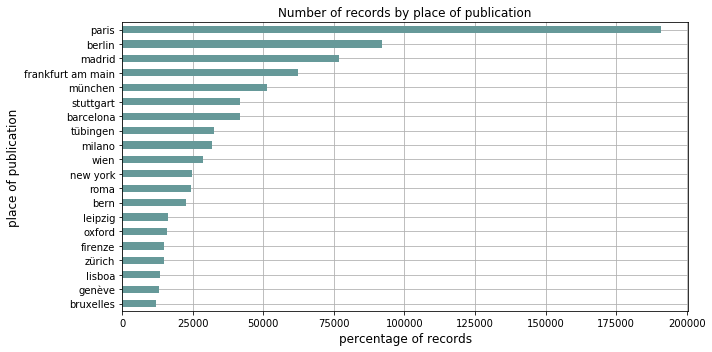

In [20]:
visualize.plot_bars(place_publication_df, head=20, percentage = False, title = "Number of records by place of publication", xlabel= "percentage of records", ylabel = "place of publication", figure_name = "bar_place_publication")        


In [21]:
place_publication_lt = place_publication_df.columns.tolist()
place_publication_lt

['paris',
 'berlin',
 'madrid',
 'frankfurt am main',
 'münchen',
 'stuttgart',
 'barcelona',
 'tübingen',
 'milano',
 'wien',
 'new york',
 'roma',
 'bern',
 'leipzig',
 'oxford',
 'firenze',
 'zürich',
 'lisboa',
 'genève',
 'bruxelles',
 'hamburg',
 'torino',
 'london',
 'boston',
 'méxico',
 'frankfurt',
 'none',
 'heidelberg',
 'amsterdam',
 'bologna',
 'cambridge',
 'reinbek bei hamburg',
 'pisa',
 'köln',
 'buenos aires',
 'bonn',
 'ismaning',
 'napoli',
 'düsseldorf',
 'sevilla',
 'kassel',
 'göttingen',
 'münster',
 'bielefeld',
 'weimar',
 'wiesbaden',
 'würzburg',
 'montréal',
 'são paulo',
 'darmstadt',
 'bucureşti',
 'saint',
 'paderborn',
 'venezia',
 'palermo',
 'vigo',
 'main',
 'basel',
 'valencia',
 'pamplona',
 'québec',
 'porto',
 'vienna',
 'la habana',
 'hildesheim',
 'salamanca',
 'padova',
 'rio de janeiro',
 'baden',
 'rennes',
 'lausanne',
 'arles',
 'granada',
 'toronto',
 'alessandria',
 'ravenna',
 'caracas',
 'zaragoza',
 'santiago de compostela',
 'baltim

In [22]:
df = pd.concat([df, place_publication_df], axis=1)

In [23]:
", ".join(place_publication_lt)


"paris, berlin, madrid, frankfurt am main, münchen, stuttgart, barcelona, tübingen, milano, wien, new york, roma, bern, leipzig, oxford, firenze, zürich, lisboa, genève, bruxelles, hamburg, torino, london, boston, méxico, frankfurt, none, heidelberg, amsterdam, bologna, cambridge, reinbek bei hamburg, pisa, köln, buenos aires, bonn, ismaning, napoli, düsseldorf, sevilla, kassel, göttingen, münster, bielefeld, weimar, wiesbaden, würzburg, montréal, são paulo, darmstadt, bucureşti, saint, paderborn, venezia, palermo, vigo, main, basel, valencia, pamplona, québec, porto, vienna, la habana, hildesheim, salamanca, padova, rio de janeiro, baden, rennes, lausanne, arles, granada, toronto, alessandria, ravenna, caracas, zaragoza, santiago de compostela, baltimore, mass, lyon, toulouse, louvain, washington, grenoble, wilhelmsfeld, leiden, calif, lima, warszawa, valladolid, dresden, caen, lille, perugia, bari, philadelphia, aix, valència, málaga, conn, provence, bogotá, frankfurt a, aachen, wood

In [24]:
df

ppn medium                               title  \
ppn                                                                 
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
309277221    309277221    Aau  Une @saison dans la vie d'Emmanuel   
1642067407  1642067407    Aau                               Camus   
1734538619  1734538619    Abv                    1 2 3..! Lecture   
...                ...    ...                                 ...   
800133854    800133854    Aau                   Die @kleine Bijou   
800133854    800133854    Aau                   Die @kleine Bijou   
800133250    800133250    Aau                       Bandera negra   
800132432    800132432    Aau          Contra a morte das linguas   
800132432    800132432    Aau          Contra a morte das linguas   

                                          title_supplement  year  \
ppn                                                                
309277221                                            roman  1991   
309277221                                            roman  1991   
309277221                                            roman  1991   
1642067407                                            None  1987   
1734538619                                            None  1982   
...                                                    ...   ...   
800133854                                            Roman  2014   
800133854                                            Roman  2014   
800133250   novell̃a basada en el setge de Cardona de 1711  2014   
800132432                                 o caso do galego  2014   
800132432                                 o caso do galego  2014   

                entry_first author_first_name  author_last_name author_gnd_id  \
ppn                                                                             
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
309277221     0003:26-01-00      Marie-Claire             Blais     283179058   
1642067407  HDBSRO:13-09-18            Morvan          Lebesque     077112679   
1734538619    2004:02-10-20              None              None          None   
...                     ...               ...               ...           ...   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133854     KALB:12-11-14           Patrick           Modiano     079561578   
800133250     0018:06-11-14             Jordi      Santasusagna     812948734   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   
800132432     0018:06-11-14            Miguel  Moreira Barbeito          None   

           editor_first_name  ... innsbruck ann arbor orléans trier napoca  \
ppn                           ...                                            
309277221               None  ...         0         0       0     0      0   
309277221               None  ...         0         0       0     0      0   
309277221               None  ...         0         0       0     0      0   
1642067407              None  ...         0         0       0     0      0   
1734538619              None  ...         0         0       0     0      0   
...                      ...  ...       ...       ...     ...   ...    ...   
800133854              Peter  ...         0         0       0     0      0   
800133854              Peter  ...         0         0       0     0      0   
800133250               None  ...         0         0       0     0      0   
800132432               None  ...         0         0       0     0      0   
800132432               None  ...         0         0       0     0      0   

           braunschweig exeter cagliari manziana mannheim  
ppn                                                        
309277221             0      0        0        

In [25]:
for place in place_publication_lt:
    if place not in df.columns.tolist():
        print(place)

In [26]:
years_place_publication_df = df.groupby(["year_publication"]).sum()[place_publication_lt]

In [27]:
years_place_publication_df

paris  berlin  madrid  frankfurt am main  münchen  \
year_publication                                                      
1980               3560     623     899                810      769   
1981               3307     563     999                775      453   
1982               3346     712    1086                715      568   
1983               3740     828    1071                685      588   
1984               3918     805    1084                937      884   
1985               4217     995    1102                962      865   
1986               4761     844    1337                947     1188   
1987               4311    1036    1419               1009     1110   
1988               4800    1084    1653               1430      984   
1989               5480    1452    1584               1502      932   
1990               5251    1038    2223               1519      965   
1991               6214     902    1978               1687     1179   
1992               5929    1305    2015               1635      930   
1993               6163    1434    1759               1433      894   
1994               6670    1615    2298               1764      908   
1995               6696    1649    2334               1759      946   
1996               6149    1571    2221               1955     1007   
1997               6780    1831    1888               1778     1105   
1998               6713    1916    2136               1744     1204   
1999               7028    2458    2550               1867     1043   
2000               5156    2488    2397               2118     1383   
2001               5638    2367    2402               1900     1383   
2002               5042    2162    2347               1686     1578   
2003               5148    2303    2429               1748     1361   
2004               4733    2490    2165               2275     1810   
2005               5114    2387    2341               1904     1715   
2006               5076    2687    2300               2271     1676   
2007               4982    2769    2374               2325     2207   
2008               4510    3110    2463               1990     1990   
2009               4103    2916    2425               1907     2237   
2010               4667    4189    2488               1886     2356   
2011               3962    7301    2301               1696     1925   
2012               4039    6144    1970               1754     1500   
2013               3987    3744    1862               1875     1490   
2014               3815    3714    1937               1479     1340   
2015               3928    3559    1737               1352     1433   
2016               3497    3501    2082               1525     1175   
2017               3165    3309    1970               1692     1540   
2018               2523    3109    1917               1241     1193   
2019               2782    3062    1359                835     1337   

                  stuttgart  barcelona  tübingen  milano  wien  ...  \
year_publication                                                ...   
1980                    342        575       481     433   130  ...   
1981                    308        555       515     488    80  ...   
1982                    314        541       402     501   122  ...   
1983                    454        594       395     495   104  ...   
1984                    525        589       598     572   157  ...   
1985                    448        682       467     512   148  ...   
1986                    554        696       649     680   146  ...   
1987                    615        751       629     769   206  ...   
1988                    579        843       766    1141   199  ...   
1989                    716        863       761     893   290  ...   
1990                    743       1062       879    1192   147  ...   
1991                    780       1159       852    1255   263  ...   
1992                    862        808   

In [28]:
years_place_publication_rel_df = years_place_publication_df.loc[:].div(years_place_publication_df.sum(axis='columns'), axis="index")*100

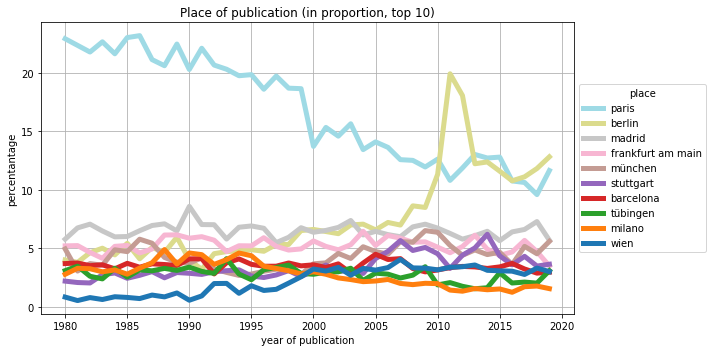

In [29]:
visualize.plot_lines(years_place_publication_rel_df.iloc[:,0:10], title = "Place of publication (in proportion, top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_place_10", title_legend = "place")


In [30]:
visualize.plot_lines(years_place_publication_rel_df.iloc[:,10:21], title = "Place of publication (in proportion, top 20)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_place_20", title_legend = "place")


C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


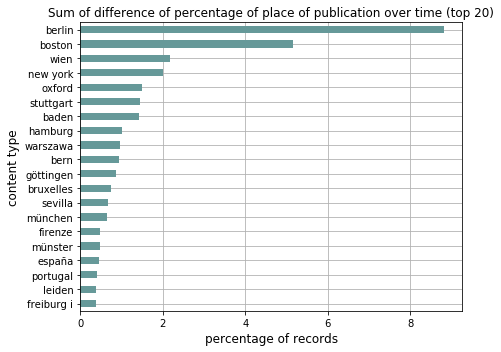

In [31]:
visualize.plot_bars(years_place_publication_rel_df.diff(), figsize = (7,5), head = 20, percentage = False, title = "Sum of difference of percentage of place of publication over time (top 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")


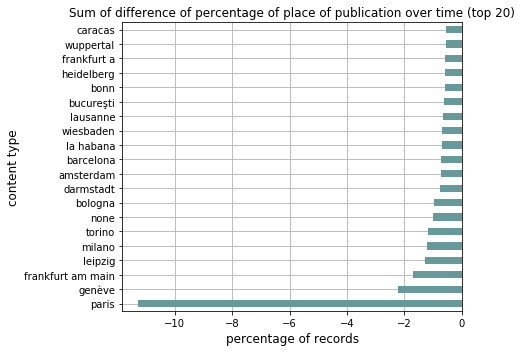

In [32]:
visualize.plot_bars(years_place_publication_rel_df.diff(), figsize = (7,5), tail = 20, percentage = False, title = "Sum of difference of percentage of place of publication over time (top 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")


In [33]:
years_place_publication_rel_df

paris     berlin    madrid  frankfurt am main   münchen  \
year_publication                                                                
1980              22.904201   4.008235  5.783954           5.211349  4.947565   
1981              22.337048   3.802769  6.747720           5.234718  3.059777   
1982              21.769681   4.632401  7.065712           4.651919  3.695511   
1983              22.641966   5.012713  6.483836           4.146991  3.559753   
1984              21.618937   4.441869  5.981350           5.170226  4.877780   
1985              23.003491   5.427667  6.011346           5.247654  4.718525   
1986              23.169011   4.107256  6.506399           4.608497  5.781303   
1987              21.120964   5.075694  6.952134           4.943413  5.438244   
1988              20.600858   4.652361  7.094421           6.137339  4.223176   
1989              22.451655   5.948869  6.489676           6.153720  3.818420   
1990              20.279612   4.008805  8.585332           5.866450  3.726876   
1991              22.091866   3.206769  7.032139           5.997582  4.191553   
1992              20.654938   4.546246  7.019683           5.695872  3.239854   
1993              20.299068   4.723165  5.793617           4.719871  2.944567   
1994              19.744242   4.780652  6.802439           5.221716  2.687822   
1995              19.837061   4.885202  6.914531           5.211080  2.802548   
1996              18.589957   4.749524  6.714636           5.910451  3.044412   
1997              19.716753   5.324687  5.490447           5.170559  3.213424   
1998              18.682511   5.332294  5.944562           4.853612  3.350774   
1999              18.639932   6.519202  6.763208           4.951729  2.766285   
2000              13.708755   6.615086  6.373136           5.631331  3.677116   
2001              15.329817   6.435913  6.531078           5.166132  3.760400   
2002              14.584900   6.253977  6.789124           4.877061  4.564651   
2003              15.638860   6.996172  7.378942           5.310165  4.134516   
2004              13.433429   7.067238  6.144807           6.457015  5.137229   
2005              14.093201   6.578113  6.451346           5.247058  4.726210   
2006              13.624285   7.212068  6.173337           6.095499  4.498484   
2007              12.576044   6.989777  5.992680           5.868989  5.571122   
2008              12.515610   8.630498  6.835022           5.522409  5.522409   
2009              11.950601   8.493286  7.063175           5.554423  6.515597   
2010              12.619653  11.327132  6.727597           5.099778  6.370667   
2011              10.804472  19.910008  6.274884           4.625034  5.249523   
2012              11.867196  18.052005  5.788159           5.153518  4.407228   
2013              13.018776  12.225306  6.080000           6.122449  4.865306   
2014              12.717091  12.380413  6.456882           4.930164  4.466816   
2015              12.793955  11.592079  5.657612           4.403622  4.667448   
2016              10.756690  10.768994  6.404183           4.690864  3.614273   
2017              10.626511  11.109992  6.614290           5.680902  5.170561   
2018               9.592426  11.820394  7.288419           4.718272  4.535777   
2019              11.646502  12.818688  5.689287           3.495625  5.597187   

                  stuttgart  barcelona  tübingen    milano      wien  ...  \
year_publication                                                      ...   
1980               2.200347   3.699415  3.094641  2.785820  0.836389  ...   
1981               2.080378   3.748734  3.478555  3.296184  0.540358  ...   
1982               2.042941   3.519844  2.615485  3.259597  0.793754  ...   
1983               2.748517   3.596077  2.391331  2.996731  0.629616  ...   
1984               2.896871   3.250014  3.299674  3.156210  0.866302  ...   
1985               2.443814   3.720271  2.547458  2.792930  0.807331  ...   
198

In [34]:
years_place_publication_rel_df.shape

(40, 200)

In [35]:
years_place_publication_rel_df.dropna(how="all")

paris     berlin    madrid  frankfurt am main   münchen  \
year_publication                                                                
1980              22.904201   4.008235  5.783954           5.211349  4.947565   
1981              22.337048   3.802769  6.747720           5.234718  3.059777   
1982              21.769681   4.632401  7.065712           4.651919  3.695511   
1983              22.641966   5.012713  6.483836           4.146991  3.559753   
1984              21.618937   4.441869  5.981350           5.170226  4.877780   
1985              23.003491   5.427667  6.011346           5.247654  4.718525   
1986              23.169011   4.107256  6.506399           4.608497  5.781303   
1987              21.120964   5.075694  6.952134           4.943413  5.438244   
1988              20.600858   4.652361  7.094421           6.137339  4.223176   
1989              22.451655   5.948869  6.489676           6.153720  3.818420   
1990              20.279612   4.008805  8.585332           5.866450  3.726876   
1991              22.091866   3.206769  7.032139           5.997582  4.191553   
1992              20.654938   4.546246  7.019683           5.695872  3.239854   
1993              20.299068   4.723165  5.793617           4.719871  2.944567   
1994              19.744242   4.780652  6.802439           5.221716  2.687822   
1995              19.837061   4.885202  6.914531           5.211080  2.802548   
1996              18.589957   4.749524  6.714636           5.910451  3.044412   
1997              19.716753   5.324687  5.490447           5.170559  3.213424   
1998              18.682511   5.332294  5.944562           4.853612  3.350774   
1999              18.639932   6.519202  6.763208           4.951729  2.766285   
2000              13.708755   6.615086  6.373136           5.631331  3.677116   
2001              15.329817   6.435913  6.531078           5.166132  3.760400   
2002              14.584900   6.253977  6.789124           4.877061  4.564651   
2003              15.638860   6.996172  7.378942           5.310165  4.134516   
2004              13.433429   7.067238  6.144807           6.457015  5.137229   
2005              14.093201   6.578113  6.451346           5.247058  4.726210   
2006              13.624285   7.212068  6.173337           6.095499  4.498484   
2007              12.576044   6.989777  5.992680           5.868989  5.571122   
2008              12.515610   8.630498  6.835022           5.522409  5.522409   
2009              11.950601   8.493286  7.063175           5.554423  6.515597   
2010              12.619653  11.327132  6.727597           5.099778  6.370667   
2011              10.804472  19.910008  6.274884           4.625034  5.249523   
2012              11.867196  18.052005  5.788159           5.153518  4.407228   
2013              13.018776  12.225306  6.080000           6.122449  4.865306   
2014              12.717091  12.380413  6.456882           4.930164  4.466816   
2015              12.793955  11.592079  5.657612           4.403622  4.667448   
2016              10.756690  10.768994  6.404183           4.690864  3.614273   
2017              10.626511  11.109992  6.614290           5.680902  5.170561   
2018               9.592426  11.820394  7.288419           4.718272  4.535777   
2019              11.646502  12.818688  5.689287           3.495625  5.597187   

                  stuttgart  barcelona  tübingen    milano      wien  ...  \
year_publication                                                      ...   
1980               2.200347   3.699415  3.094641  2.785820  0.836389  ...   
1981               2.080378   3.748734  3.478555  3.296184  0.540358  ...   
1982               2.042941   3.519844  2.615485  3.259597  0.793754  ...   
1983               2.748517   3.596077  2.391331  2.996731  0.629616  ...   
1984               2.896871   3.250014  3.299674  3.156210  0.866302  ...   
1985               2.443814   3.720271  2.547458  2.792930  0.807331  ...   
198

In [36]:
#years_place_publication_rel_df.drop("none", axis="columns", inplace=True)
#years_place_publication_rel_df.drop("rennes", axis="columns", inplace=True)


In [37]:
years_place_publication_rel_df.iloc[:,20:30]

hamburg    torino    london    boston    méxico  frankfurt  \
year_publication                                                                
1980              0.591906  1.621309  0.990800  0.199447  0.617641   0.585473   
1981              0.682202  1.492739  1.148261  0.263425  0.830800   0.830800   
1982              1.138582  1.587508  1.574496  0.227716  0.624593   0.858816   
1983              1.065504  1.410582  1.913065  0.254268  0.883884   0.787020   
1984              0.733874  1.197374  1.191856  0.281410  1.462230   1.131159   
1985              1.101898  0.867336  0.812786  0.583679  1.871045   1.123718   
1986              1.323665  1.002482  1.182539  0.160592  1.498856   0.622901   
1987              0.725099  1.146441  0.847582  0.191073  1.131743   0.901475   
1988              0.815451  1.047210  0.682403  0.223176  1.120172   1.218884   
1989              0.549000  1.663389  0.635038  0.188463  1.065225   0.159784   
1990              0.556135  1.289924  1.622060  0.166068  1.537095   0.811030   
1991              1.503840  1.134101  0.863908  0.095990  0.700370   0.661263   
1992              0.797770  1.390002  0.884863  0.066191  1.282007   1.271555   
1993              1.004578  1.333948  0.882711  0.092224  0.978229   1.297717   
1994              0.772601  1.598484  0.947250  0.038482  1.018294   1.110059   
1995              1.051696  1.253148  0.870982  0.020738  0.930233   0.909495   
1996              0.674184  1.188137  0.946277  0.000000  1.315113   0.656045   
1997              0.825894  1.221392  1.151598  0.029081  1.014918   0.482741   
1998              0.960147  1.127129  0.801514  0.139152  0.709674   0.734721   
1999              0.928283  1.066200  1.201464  0.236049  0.671016   1.153724   
2000              0.627476  1.076813  1.098083  0.249927  0.728510   0.515807   
2001              0.638969  1.025069  0.753168  0.097885  0.592746   0.976127   
2002              0.882268  1.194677  1.026902  0.080995  0.517790   0.647961   
2003              0.741236  0.808069  0.859712  0.127590  0.571116   0.422261   
2004              0.624415  0.942298  1.064343  0.360458  0.942298   0.706724   
2005              0.835010  0.777138  0.942486  0.129523  0.545650   0.388569   
2006              0.791798  0.756905  1.027995  0.289878  0.692487   0.499235   
2007              1.100593  0.737095  0.699230  0.330683  0.547772   1.087972   
2008              0.915776  0.646594  0.735396  0.208131  0.774247   0.888026   
2009              0.707774  0.553403  0.646608  0.145632  0.678647   0.824280   
2010              1.143800  0.540804  0.554324  0.227138  0.735493   0.946406   
2011              1.595310  0.594491  0.608127  0.499046  0.373602   1.118080   
2012              0.987219  0.423094  0.496548  0.155722  0.484795   0.719847   
2013              1.289796  0.352653  0.711837  0.911020  0.473469   0.591020   
2014              1.343378  0.586686  0.386680  2.156739  0.626688   0.613354   
2015              1.661130  0.498339  0.768680  2.866263  0.511367   0.462511   
2016              1.384189  0.421409  0.984313  5.093817  0.350661   0.126115   
2017              1.141553  0.329036  1.118050  4.925463  0.174590   0.228311   
2018              1.421945  0.479051  1.060756  4.265835  0.178694   0.231922   
2019              1.607569  0.439570  0.987985  5.362750  0.171641   0.339097   

                      none  heidelberg  amsterdam   bologna  
year_publication                                             
1980              1.003667    1.621309   0.823522  1.421862  
1981              0.547112    1.411685   0.938872  1.155015  
1982              0.657124    0.936890   0.494470  0.936890  
1983              0.895992    1.059450   0.514590  0.714372  
1984              0.739392    1.202891   0.893892  0.629035  
1985              0.463670    0.965525   0.643683  0.654593  
1986              0.676432    1.255536   0.700764  0.364981  
1987              0.617314    0.529126   0.426241  0.69570

In [38]:
years_place_publication_rel_df.iloc[:,70:80]

lausanne     arles   granada   toronto  alessandria  \
year_publication                                                        
1980              0.765618  0.000000  0.012868  0.045036     0.128675   
1981              0.466059  0.020263  0.087808  0.000000     0.006754   
1982              0.500976  0.006506  0.162655  0.201692     0.006506   
1983              0.381402  0.036324  0.012108  0.211890     0.006054   
1984              0.270375  0.027589  0.115875  0.237268     0.187607   
1985              0.163648  0.109099  0.081824  0.081824     0.060004   
1986              0.262787  0.165458  0.111928  0.053531     0.014599   
1987              0.220469  0.102886  0.048993  0.088188     0.044094   
1988              0.188841  0.115880  0.188841  0.060086     0.171674   
1989              0.225336  0.188463  0.274500  0.233530     0.127008   
1990              0.251033  0.200826  0.243309  0.173792     0.220137   
1991              0.295080  0.103100  0.241752  0.174204     0.113766   
1992              0.167218  0.045288  0.285665  0.073158     0.229925   
1993              0.230559  0.161391  0.118573  0.092224     0.108692   
1994              0.171689  0.230892  0.266414  0.148008     0.142088   
1995              0.112576  0.272552  0.186639  0.077026     0.165901   
1996              0.196511  0.154186  0.266046  0.256976     0.341627   
1997              0.232646  0.348969  0.113415  0.087242     0.159944   
1998              0.164199  0.158633  0.128020  0.116887     0.178114   
1999              0.129960  0.151178  0.068958  0.095481     0.214831   
2000              0.162187  0.162187  0.098375  0.103693     0.135599   
2001              0.084290  0.111480  0.152265  0.048942     0.154984   
2002              0.112815  0.118600  0.135956  0.095458     0.135956   
2003              0.164044  0.148855  0.197460  0.343277     0.167082   
2004              0.181648  0.181648  0.158942  0.227060     0.198677   
2005              0.151569  0.132279  0.159837  0.038581     0.195662   
2006              0.115415  0.150307  0.182516  0.091258     0.144939   
2007              0.050486  0.128739  0.209517  0.345829     0.143885   
2008              0.088803  0.233107  0.155404  0.124879     0.105453   
2009              0.093205  0.224274  0.113593  0.157283     0.133982   
2010              0.248770  0.235250  0.140609  0.148721     0.113569   
2011              0.109081  0.136351  0.242705  0.155440     0.128170   
2012              0.135155  0.220361  0.129279  0.111650     0.193918   
2013              0.062041  0.199184  0.094694  0.248163     0.150204   
2014              0.046668  0.213340  0.093336  0.290010     0.120004   
2015              0.140056  0.224741  0.179141  0.345254     0.156342   
2016              0.141495  0.230698  0.218394  0.193787     0.184559   
2017              0.073865  0.204808  0.224953  0.218238     0.188020   
2018              0.076040  0.190100  0.231922  0.159684     0.281347   
2019              0.100473  0.167455  0.205132  0.213505     0.205132   

                   ravenna   caracas  zaragoza  santiago de compostela  \
year_publication                                                         
1980              0.231616  0.572605  0.231616                0.173712   
1981              0.364742  0.729483  0.087808                0.108072   
1982              0.448926  0.416396  0.188679                0.078074   
1983              0.133188  0.090810  0.048432                0.108972   
1984              0.132428  0.424874  0.093803                0.148982   
1985              0.589134  0.638228  0.060004                0.130919   
1986              0.077863  0.399046  0.165458                0.087596   
1987              0.083288  0.279261  0.034295                0.019597   
1988              0.098712  0.253219  0.000000                0.034335   
1989              0.049164  0.352343  0.073746                0.122911   
1990              0.046345  0.239447  0.281929                0

In [39]:
years_place_publication_rel_df["rennes"]

year_publication
1980    0.038603
1981    0.000000
1982    0.026025
1983    0.000000
1984    0.060696
1985    0.005455
1986    0.058397
1987    0.107785
1988    0.000000
1989    0.143396
1990    0.030896
1991    0.035552
1992    0.073158
1993    0.075755
1994    0.035522
1995    0.106651
1996    0.021163
1997    0.098875
1998    0.180897
1999    0.084872
2000    0.114328
2001    0.154984
2002    0.060746
2003    0.215687
2004    0.195839
2005    0.270069
2006    0.201304
2007    0.229711
2008    0.255307
2009    0.186410
2010    0.348818
2011    0.237251
2012    0.381960
2013    0.489796
2014    0.356679
2015    0.371311
2016    0.295294
2017    0.386113
2018    0.148278
2019    0.205132
Name: rennes, dtype: float64

In [40]:
regression_results_place_df = statistical_tests.calculate_regression_line(years_place_publication_rel_df)

In [41]:
regression_results_place_df.loc[(regression_results_place_df["pvalue"] < 0.001) & (regression_results_place_df["slope"] > 0) ]


column     slope   intercept    rvalue  \
column                                                                 
berlin                        berlin  0.262410 -517.227228  0.794155   
wien                            wien  0.085250 -168.232458  0.887060   
boston                        boston  0.078708 -156.577699  0.615709   
stuttgart                  stuttgart  0.063658 -123.860437  0.739554   
bern                            bern  0.053245 -104.689647  0.815899   
oxford                        oxford  0.037424  -73.534215  0.677492   
new york                    new york  0.035111  -68.214158  0.563726   
bielefeld                  bielefeld  0.022609  -44.937333  0.785777   
göttingen                  göttingen  0.019156  -38.022704  0.806004   
paderborn                  paderborn  0.015942  -31.644404  0.600236   
warszawa                    warszawa  0.015312  -30.482549  0.575250   
sevilla                      sevilla  0.015101  -29.870116  0.813429   
würzburg                    würzburg  0.012719  -25.181486  0.763580   
münster                      münster  0.009812  -19.343672  0.665692   
rennes                        rennes  0.009155  -18.148256  0.829101   
españa                        españa  0.008933  -17.768355  0.578930   
leiden                        leiden  0.007908  -15.685187  0.669476   
alfragide                  alfragide  0.007492  -14.910190  0.717028   
vigo                            vigo  0.007421  -14.622015  0.800524   
portugal                    portugal  0.006187  -12.316479  0.611617   
turnhout                    turnhout  0.005547  -11.018566  0.783271   
woodbridge                woodbridge  0.005155  -10.223299  0.623809   
porto                          porto  0.004832   -9.464688  0.681148   
valencia                    valencia  0.004541   -8.864301  0.548919   
seelze                        seelze  0.004099   -8.132620  0.539716   
arles                          arles  0.003860   -7.562428  0.596400   
córdoba                      córdoba  0.003788   -7.504850  0.722225   
bamberg                      bamberg  0.003510   -6.943004  0.549310   
saarbrücken              saarbrücken  0.003475   -6.894733  0.657296   
alcalá de henares  alcalá de henares  0.003197   -6.315814  0.614762   
villeneuve d'ascq  villeneuve d'ascq  0.003181   -6.270613  0.531990   
lleida                        lleida  0.003139   -6.218846  0.813344   
braunschweig            braunschweig  0.002540   -5.036672  0.554383   
dijon                          dijon  0.002539   -5.022418  0.737184   

                         pvalue    stderr  
column                                     
berlin             9.632905e-10  0.032575  
wien               2.525784e-14  0.007197  
boston             2.349344e-05  0.016340  
stuttgart          4.995445e-08  0.009399  
bern               1.416008e-10  0.006121  
oxford             1.574368e-06  0.006591  
new york           1.519535e-04  0.008345  
bielefeld          1.899229e-09  0.002887  
göttingen          3.490519e-10  0.002282  
paderborn          4.236960e-05  0.003446  
warszawa           1.032104e-04  0.003532  
sevilla            1.782441e-10  0.001752  
würzburg           1.000866e-08  0.001745  
münster            2.768565e-06  0.001784  
rennes             3.893607e-11  0.001001  
españa             9.093748e-05  0.002041  
leiden             2.316511e-06  0.001423  
alfragide          1.940028e-07  0.001182  
vigo               5.628941e-10  0.000901  
portugal           2.754121e-05  0.001298  
turnhout           2.313286e-09  0.000714  
woodbridge         1.703590e-05  0.001048  
porto              1.314868e-06  0.000843  
valencia           2.447189e-04  0.001122  
seelze             3.254671e-04  0.001037  
arles              4.881131e-05  0.000843  
córdoba            1.435244e-07  0.000588  
bamberg            2.417307e-04  0.000866  
saarbrücken        4.075574e-06  0.000646  
alcalá de henares  2.437832e-05  0.000665  
villeneuve d'ascq  4.109108e-

In [42]:
regression_results_place_df.loc[(regression_results_place_df["pvalue"] < 0.001) & (regression_results_place_df["slope"] < 0) ]

column     slope   intercept    rvalue  \
column                                                                     
ann arbor                      ann arbor -0.002899    5.849450 -0.540928   
mexico                            mexico -0.003158    6.372443 -0.708867   
berkeley                        berkeley -0.003405    6.870754 -0.577726   
bogotá                            bogotá -0.003624    7.363114 -0.542924   
princeton                      princeton -0.003630    7.330860 -0.636384   
mich                                mich -0.003916    7.901260 -0.625571   
conn                                conn -0.004057    8.223252 -0.503900   
exeter                            exeter -0.004086    8.224279 -0.788052   
cuba                                cuba -0.004361    8.784186 -0.830472   
montréal                        montréal -0.004439    9.150889 -0.512931   
padova                            padova -0.004500    9.190979 -0.563780   
wuppertal                      wuppertal -0.005066   10.225514 -0.588301   
ottawa                            ottawa -0.005196   10.463852 -0.592631   
lyon                                lyon -0.005427   11.004956 -0.572800   
salamanca                      salamanca -0.005841   11.876492 -0.621468   
frankfurt a                  frankfurt a -0.006851   13.820589 -0.505407   
calif                              calif -0.007597   15.332122 -0.769691   
lille                              lille -0.007934   15.994225 -0.756240   
lausanne                        lausanne -0.008438   17.065657 -0.716881   
berne                              berne -0.009044   18.176482 -0.708362   
napoli                            napoli -0.010253   20.882869 -0.683690   
weimar                            weimar -0.011668   23.645610 -0.544886   
caracas                          caracas -0.012558   25.289786 -0.773172   
main                                main -0.012623   25.482046 -0.673323   
darmstadt                      darmstadt -0.013703   27.705894 -0.668102   
bologna                          bologna -0.013763   28.170692 -0.663000   
bucureşti                      bucureşti -0.013818   27.921054 -0.780880   
bonn                                bonn -0.014139   28.752312 -0.547725   
reinbek bei hamburg  reinbek bei hamburg -0.016277   33.132156 -0.515482   
la habana                      la habana -0.018580   37.394247 -0.871337   
méxico                            méxico -0.023569   47.924737 -0.709487   
tübingen                        tübingen -0.026451   55.669900 -0.529801   
torino                            torino -0.029475   59.906486 -0.876468   
genève                            genève -0.041204   83.576949 -0.817285   
milano                            milano -0.068014  138.770998 -0.777758   
paris                              paris -0.366979  750.626433 -0.958042   

                           pvalue    stderr  
column                                       
ann arbor            3.136201e-04  0.000731  
mexico               3.073482e-07  0.000510  
berkeley             9.479850e-05  0.000780  
bogotá               2.949449e-04  0.000909  
princeton            1.015654e-05  0.000714  
mich                 1.586673e-05  0.000792  
conn                 9.165850e-04  0.001128  
exeter               1.584260e-09  0.000518  
cuba                 3.383586e-11  0.000475  
montréal             7.135239e-04  0.001205  
padova               1.516830e-04  0.001069  
wuppertal            6.542248e-05  0.001130  
ottawa               5.599490e-05  0.001146  
lyon                 1.121893e-04  0.001260  
salamanca            1.871154e-05  0.001195  
frankfurt a          8.794938e-04  0.001897  
calif                6.451333e-09  0.001022  
lille                1.667648e-08  0.001114  
lausanne             1.956507e-07  0.001331  
berne                3.160776e-07  0.001462  
napoli               1.158304e-06  0.001775  
weimar               2.775722e-04  0.002913  
caracas              4.993362e-09  0.0016

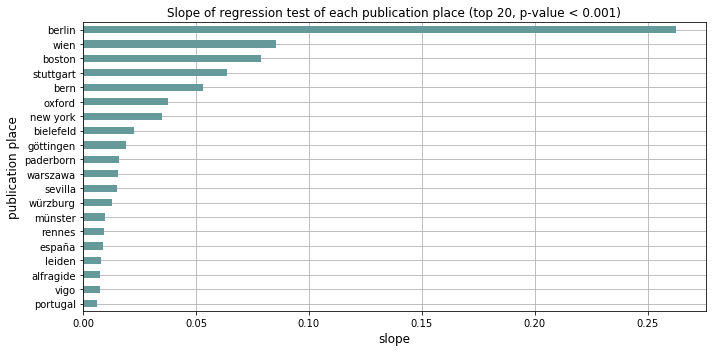

In [45]:
visualize.plot_bars(regression_results_place_df.loc[regression_results_place_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each publication place (top 20, p-value < 0.001)", xlabel ="slope", ylabel = "publication place", figure_name = "bar_slop_publication_top_place", figsize=(10,5))

In [46]:
visualize.plot_bars(regression_results_place_df.loc[regression_results_place_df["pvalue"] < 0.001][["slope"]].tail(20).T, title ="Slope of regression test of each publication place (bottom 20, p-value < 0.001)", xlabel ="slope", ylabel = "publication place", figure_name = "bar_slop_publication_bottom_place", figsize=(10,5))

# Pages

In [108]:
ppns_lt = ["870335774","883845415","63062027X","04202742X","23821088X","493526757","1680636065","05511024X","164013156","272174874"]

In [109]:
#df[["title", "pages"]].sample(10)
df.loc[ppns_lt].groupby("title").head(1)[["title", "pages"]].sample(10)

title             pages
ppn                                                                     
04202742X                           Der @Junge Alberto            195 S.
1680636065                          Romanische Studien  Online-Ressource
272174874                   Il @sudario delle caligini            265 S.
870335774                  La @profezia di Cittastella        318 Seiten
23821088X                                   Das @Opfer            339 S.
63062027X                                    Expuestos             168 p
883845415                                 Suma de ecos         24 Seiten
05511024X                                  Erkundungen            326 S.
164013156     Lernerwörterbücher in Theorie und Praxis       VIII, 376 S
493526757   Parentés franco-espagnoles au XVIIe siècle             642 S

In [110]:
df["pages_extracted"] = df["pages"].str.findall("\d+").str.get(0)

In [111]:
df["pages_extracted"] = df["pages_extracted"].fillna(np.NaN).astype(float)

In [112]:
round(df["pages"].notna().sum() / df.shape[0], 2)*100

95.0

In [113]:
round(df["pages_extracted"].notna().sum() / df.shape[0], 2)*100

91.0

In [114]:
df.loc[ppns_lt].groupby("title").head(1)[["title", "pages", "pages_extracted"]].sample(10)

title             pages  \
ppn                                                                        
63062027X                                    Expuestos             168 p   
23821088X                                   Das @Opfer            339 S.   
164013156     Lernerwörterbücher in Theorie und Praxis       VIII, 376 S   
272174874                   Il @sudario delle caligini            265 S.   
493526757   Parentés franco-espagnoles au XVIIe siècle             642 S   
1680636065                          Romanische Studien  Online-Ressource   
870335774                  La @profezia di Cittastella        318 Seiten   
05511024X                                  Erkundungen            326 S.   
04202742X                           Der @Junge Alberto            195 S.   
883845415                                 Suma de ecos         24 Seiten   

            pages_extracted  
ppn                          
63062027X             168.0  
23821088X             339.0  
164013156             376.0  
272174874             265.0  
493526757             642.0  
1680636065              NaN  
870335774             318.0  
05511024X             326.0  
04202742X             195.0  
883845415              24.0

In [115]:
sample_1000_df = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(1000, random_state=2021)

In [116]:
sample_10000_df = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(10000, random_state=2021)

In [117]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )]

In [118]:
sample_1000_df.plot.scatter("year_publication", "pages_extracted", color = color)

In [119]:
def plot_scatter_w_regression_line(df, x_column = "", y_column = "", color = color, title = "", xlabel = "", ylabel = "", outdir = "./../visualizations/", figure_name = "scatter_w_regression_line_"):
    

    ax = sns.regplot(x = x_column, y = y_column, data = df, color = color)

    ax.set_axisbelow(True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    fig = ax.get_figure()
    fig.savefig( outdir + figure_name + ".png", dpi=300, format="png")


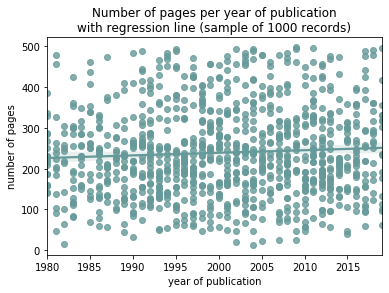

In [120]:
visualize.plot_scatter_w_regression_line(sample_1000_df, x_column = "year_publication",
y_column = "pages_extracted", title = "Number of pages per year of publication\nwith regression line (sample of 1000 records)",
xlabel = "year of publication", ylabel = "number of pages",
figure_name = "scatter_year_publication_pages"
)

In [121]:
results = stats.linregress(df_no_na["year_publication"], df_no_na["pages_extracted"])
results

#calculate_regression(df.loc[(df["year_publication"].notna()) & (df["pages_extracted"].notna()) & (df["pages_extracted"]< 500 ) & (df["pages_extracted"]> 10 )].sample(1000, random_state=2021), "year_publication", "pages_extracted")

LinregressResult(slope=0.5985768175909764, intercept=-952.1607110919784, rvalue=0.0583329759554504, pvalue=0.0, stderr=0.011238597914279268)

In [122]:
results = stats.linregress(sample_1000_df["year_publication"], sample_1000_df["pages_extracted"])
results


LinregressResult(slope=0.638367148784024, intercept=-1037.6982737800452, rvalue=0.061828077236967656, pvalue=0.05063026478440466, stderr=0.3262029139844959)

In [123]:
results = stats.linregress(sample_10000_df["year_publication"], sample_10000_df["pages_extracted"])
results


LinregressResult(slope=0.7101798961929561, intercept=-1176.557789047289, rvalue=0.07052011178315794, pvalue=1.6659865458541761e-12, stderr=0.10046533339460997)

In [124]:
df_no_na.loc[df_no_na["year_publication"]== 1980]["pages_extracted"].mean()

235.68768270522241

In [125]:
df_no_na.loc[df_no_na["year_publication"]== 2019]["pages_extracted"].mean()

252.98041997729854

# Format

In [ ]:
df["format"].notna().sum() / df.shape[0] * 100

38.89881588587486

In [ ]:
df["format"].value_counts()

21 cm                       91643
24 cm                       68677
22 cm                       53643
23 cm                       49535
19 cm                       23933
                            ...  
12 cm (110 min)                 1
28 cm, 453 g                    1
205 mm x 210 mm, 270 gr.        1
24 cm, 400 gr.                  1
225 mm x 155 mm, 510 g          1
Name: format, Length: 3470, dtype: int64

In [ ]:
#df["format_extracted"]
df["format_extracted"] = df["format"].str.findall("(\d+) cm").str.get(0)

In [ ]:
df["format_extracted"].notna().sum() / df.shape[0] * 100

36.46874183534949

In [ ]:
df["format_extracted"] = df["format_extracted"].fillna(np.NaN).astype(float)

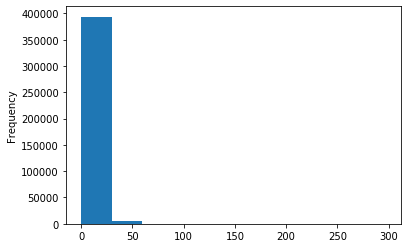

In [ ]:
df["format_extracted"].plot.hist()

In [ ]:
sorted(df["format_extracted"].unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 47.0,
 48.0,
 49.0,
 50.0,
 54.0,
 62.0,
 68.0,
 84.0,
 89.0,
 117.0,
 190.0,
 205.0,
 210.0,
 212.0,
 213.0,
 215.0,
 219.0,
 221.0,
 223.0,
 225.0,
 235.0,
 243.0,
 297.0]

In [ ]:
df["format_extracted"].plot.box()

In [ ]:
sample_1000_df = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna())  & (df["format_extracted"] < 200)  ].sample(1000, random_state=2021)

In [ ]:
sample_10000_df = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna()) ].sample(10000, random_state=2021)

In [ ]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna()) & (df["format_extracted"]< 100 ) & (df["format_extracted"]> 10 )]

In [ ]:
sample_1000_df.plot.scatter("year_publication", "format_extracted")

In [ ]:
df_no_na = df.loc[(df["year_publication"].notna()) & (df["format_extracted"].notna())]

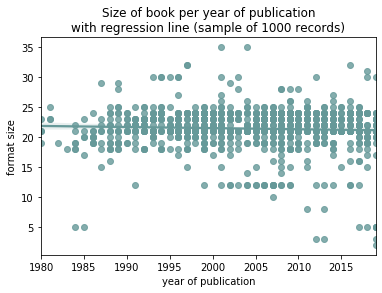

In [ ]:
visualize.plot_scatter_w_regression_line(sample_1000_df, x_column = "year_publication",
y_column = "format_extracted", title = "Size of book per year of publication\nwith regression line (sample of 1000 records)",
xlabel = "year of publication", ylabel = "format size",
figure_name = "scatter_year_publication_format"
)

In [ ]:
#sns.regplot(x="year_publication", y="format_extracted", data = df_no_na, color = color)


In [ ]:
results = stats.linregress(sample_1000_df["year_publication"], sample_1000_df["format_extracted"])
results

LinregressResult(slope=-0.01825702123458618, intercept=58.01370370133638, rvalue=-0.047912122003751396, pvalue=0.13000328654918838, stderr=0.012048145233143487)

In [ ]:
results = stats.linregress(sample_10000_df["year_publication"], sample_10000_df["format_extracted"])
results

LinregressResult(slope=-0.008643863846072353, intercept=38.802096401729806, rvalue=-0.015171800785782591, pvalue=0.12924706058711016, stderr=0.00569723626735924)

In [ ]:
results = stats.linregress(df_no_na["year_publication"], df_no_na["format_extracted"])
results

LinregressResult(slope=-0.007649436912010851, intercept=36.756517543877806, rvalue=-0.01587900285278028, pvalue=1.0868871570427987e-23, stderr=0.000762347449071006)

In [ ]:
df_no_na.loc[df_no_na["year_publication"]== 1980]["format_extracted"].mean()

20.270394736842107

In [ ]:
df_no_na.loc[df_no_na["year_publication"]== 2019]["format_extracted"].mean()

20.214607565755003